In [1]:
# import cv2
# import numpy as np
# import glob

# # Path to the frames
# frame_path = 'frames/frame_*.png'
# frames = sorted(glob.glob(frame_path))

# # Limit to the first 500 frames
# frames = frames[:500]

# # Print the paths of the frames
# print(frames)

# # Initialize an empty list to store the green channel arrays
# green_channels = []

# # Loop through the first 500 frames and extract the green channel
# for i, frame_path in enumerate(frames):
#     print(f"Processing frame {i+1}/{len(frames)}")
#     frame = cv2.imread(frame_path)
#     green_channel = frame[:, :, 1]  # Extract the green channel
#     green_channels.append(green_channel)

# # Concatenate all green channel arrays into a single array
# green_channels_array = np.concatenate(green_channels, axis=0)

# print("Green channel concatenated array shape:", green_channels_array.shape)


['frames\\frame_00000.png', 'frames\\frame_00001.png', 'frames\\frame_00002.png', 'frames\\frame_00003.png', 'frames\\frame_00004.png', 'frames\\frame_00005.png', 'frames\\frame_00006.png', 'frames\\frame_00007.png', 'frames\\frame_00008.png', 'frames\\frame_00009.png', 'frames\\frame_00010.png', 'frames\\frame_00011.png', 'frames\\frame_00012.png', 'frames\\frame_00013.png', 'frames\\frame_00014.png', 'frames\\frame_00015.png', 'frames\\frame_00016.png', 'frames\\frame_00017.png', 'frames\\frame_00018.png', 'frames\\frame_00019.png', 'frames\\frame_00020.png', 'frames\\frame_00021.png', 'frames\\frame_00022.png', 'frames\\frame_00023.png', 'frames\\frame_00024.png', 'frames\\frame_00025.png', 'frames\\frame_00026.png', 'frames\\frame_00027.png', 'frames\\frame_00028.png', 'frames\\frame_00029.png', 'frames\\frame_00030.png', 'frames\\frame_00031.png', 'frames\\frame_00032.png', 'frames\\frame_00033.png', 'frames\\frame_00034.png', 'frames\\frame_00035.png', 'frames\\frame_00036.png', 

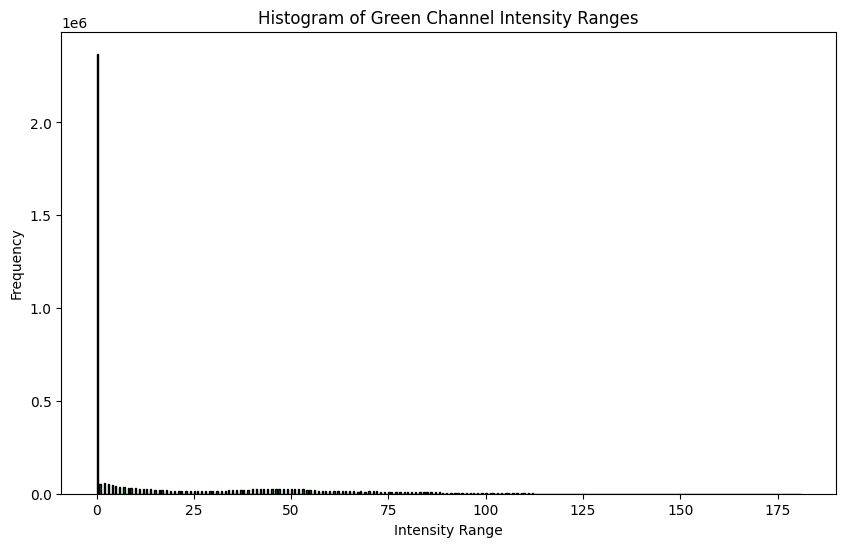

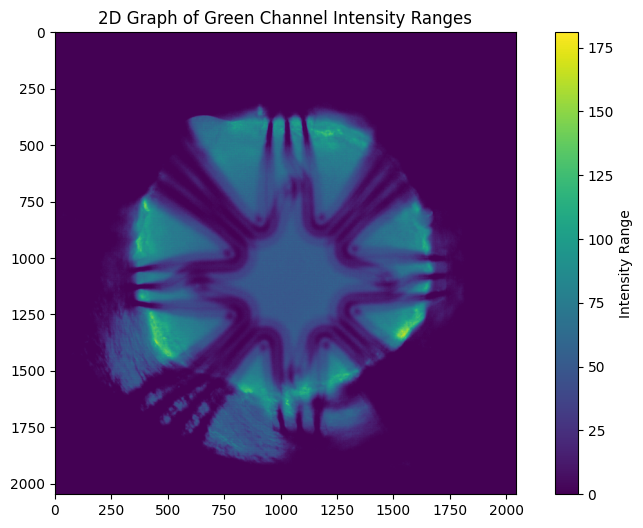

Green channel intensity range computation and plotting completed.


In [2]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

# Path to the frames
frame_path = 'frames/frame_*.png'
frames = sorted(glob.glob(frame_path))

# Limit to the first 500 frames
frames = frames[:500]

# Print the paths of the frames
print(frames)

# Read the first frame to get the dimensions
first_frame = cv2.imread(frames[0])
height, width = first_frame.shape[:2]

# Initialize arrays to store the minimum and maximum intensity values
min_intensity = np.full((height, width), np.inf)
max_intensity = np.full((height, width), -np.inf)

# Loop through the frames and compute the min and max intensity for each pixel
for i, frame_path in enumerate(frames):
    print(f"Processing frame {i+1}/{len(frames)}")
    frame = cv2.imread(frame_path)
    green_channel = frame[:, :, 1]  # Extract the green channel
    
    min_intensity = np.minimum(min_intensity, green_channel)
    max_intensity = np.maximum(max_intensity, green_channel)

# Compute the range for each pixel
intensity_range = max_intensity - min_intensity

# Flatten the intensity range array for the histogram
intensity_range_flat = intensity_range.flatten()

# Plot the histogram of the intensity ranges
plt.figure(figsize=(10, 6))
plt.hist(intensity_range_flat, bins=500, color='green', edgecolor='black')
plt.xlabel('Intensity Range')
plt.ylabel('Frequency')
plt.title('Histogram of Green Channel Intensity Ranges')
plt.show()

# Plot the 2D graph of the intensity ranges
plt.figure(figsize=(10, 6))
plt.imshow(intensity_range, cmap='viridis')
plt.colorbar(label='Intensity Range')
plt.title('2D Graph of Green Channel Intensity Ranges')
plt.show()

print("Green channel intensity range computation and plotting completed.")


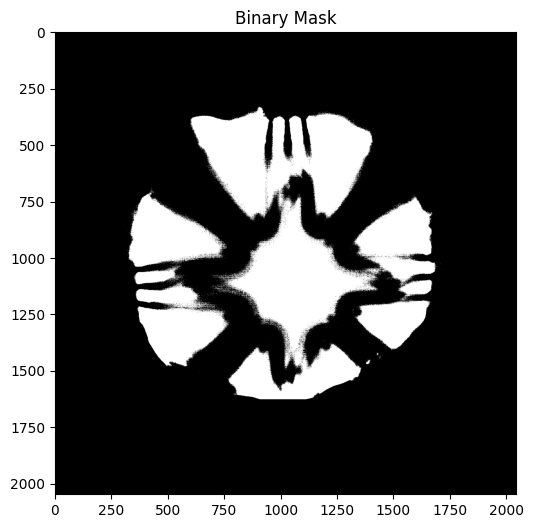

Details for the mask file: final_binary_mask.png
Shape: (2048, 2044)
Data type: uint8
Unique values: [  0 255]


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary mask file
binary_mask_path = 'final_binary_mask.png'
binary_mask = cv2.imread(binary_mask_path, cv2.IMREAD_GRAYSCALE)

# Function to display the binary mask and print its details
def display_and_print_details(mask, mask_path):
    # Display the binary mask
    plt.figure(figsize=(10, 6))
    plt.imshow(mask, cmap='gray')
    plt.title('Binary Mask')
    plt.show()

    # Print details about the mask
    print(f"Details for the mask file: {mask_path}")
    print(f"Shape: {mask.shape}")
    print(f"Data type: {mask.dtype}")
    print(f"Unique values: {np.unique(mask)}")

# Display the binary mask and print its details
display_and_print_details(binary_mask, binary_mask_path)


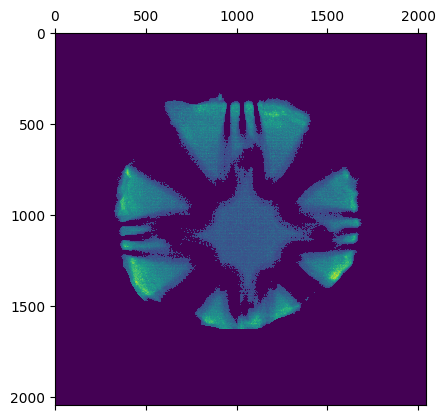

Green channel intensity range computation and plotting completed.


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

# Load the binary mask file
binary_mask_path = 'final_binary_mask.png'
binary_mask = cv2.imread(binary_mask_path, cv2.IMREAD_GRAYSCALE)

# Load the intensity range file
intensity_range_file = 'intensity_range.pkl'
with open(intensity_range_file, 'rb') as f:
    intensity_range = pickle.load(f)

# Ensure the mask and intensity range have the same shape
if binary_mask.shape != intensity_range.shape:
    raise ValueError("The mask and intensity range do not have the same shape.")

# Apply the mask to the intensity range
masked_intensity_range = np.where(binary_mask == 255, intensity_range, 0)

plt.matshow(masked_intensity_range)
plt.show()

print("Green channel intensity range computation and plotting completed.")


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
%matplotlib tk
# Load the binary mask file
binary_mask_path = 'final_binary_mask.png'
binary_mask = cv2.imread(binary_mask_path, cv2.IMREAD_GRAYSCALE)

# Load the intensity range file
intensity_range_file = 'intensity_range.pkl'
with open(intensity_range_file, 'rb') as f:
    intensity_range = pickle.load(f)

# Ensure the mask and intensity range have the same shape
if binary_mask.shape != intensity_range.shape:
    raise ValueError("The mask and intensity range do not have the same shape.")

# Path to the frames
frame_path = 'frames/frame_*.png'
frames = sorted(glob.glob(frame_path))

# Limit to the first 500 frames
frames = frames[:500]

# Read the first frame to get the dimensions
first_frame = cv2.imread(frames[0])
height, width = first_frame.shape[:2]

# Initialize a 3D array to store the green channel intensity values
num_frames = min(len(frames), 80)
frames_data = np.zeros((height, width, num_frames), dtype=np.float32)

# Loop through the frames and extract the green channel intensity
for i, frame_path in enumerate(frames[:num_frames]):
    print(f"Processing frame {i+1}/{num_frames}")
    frame = cv2.imread(frame_path)
    green_channel = frame[:, :, 1]  # Extract the green channel
    frames_data[:, :, i] = green_channel

# Function to calculate latency based on threshold
def calculate_latency(data, frame_rate):
    height, width, num_frames = data.shape
    latencies = np.zeros((height, width))
    for i in range(height):
        print(f"Processing row {i+1}/{height}")
        for j in range(width):
            if binary_mask[i, j] == 255:  # Only process pixels within the mask
                channel_data = data[i-10:i+10, j-10:j+10, 30:]
                channel_data = np.mean(channel_data, axis=(0, 1))
                min_val = np.min(channel_data)
                max_val = np.max(channel_data)
                threshold = min_val + 0.5 * (max_val - min_val)
                exceeding_indices = np.where(channel_data >= threshold)[0]
                if exceeding_indices.size > 0:
                    latency_index = exceeding_indices[0]
                else:
                    latency_index = -1  # If threshold is never exceeded
                latency_time = latency_index / frame_rate
                latencies[i, j] = latency_time
            else:
                latencies[i, j] = np.nan  # Use NaN for pixels outside the mask
    return latencies

# Example frame rate (replace with actual frame rate)
frame_rate = 60.0

# Calculate latencies
latencies = calculate_latency(frames_data, frame_rate)
latencies = (latencies - np.nanmin(latencies)) * 1000  # in ms

# Display the latency map
plt.matshow(latencies, cmap='viridis')
plt.colorbar(label='Latency (ms)')
plt.title('Latency Map')
plt.show()
# Plot the histogram of latency values, ignoring NaNs


print("Green channel intensity range computation and plotting completed.")



Processing frame 1/80
Processing frame 2/80
Processing frame 3/80
Processing frame 4/80
Processing frame 5/80
Processing frame 6/80
Processing frame 7/80
Processing frame 8/80
Processing frame 9/80
Processing frame 10/80
Processing frame 11/80
Processing frame 12/80
Processing frame 13/80
Processing frame 14/80
Processing frame 15/80
Processing frame 16/80
Processing frame 17/80
Processing frame 18/80
Processing frame 19/80
Processing frame 20/80
Processing frame 21/80
Processing frame 22/80
Processing frame 23/80
Processing frame 24/80
Processing frame 25/80
Processing frame 26/80
Processing frame 27/80
Processing frame 28/80
Processing frame 29/80
Processing frame 30/80
Processing frame 31/80
Processing frame 32/80
Processing frame 33/80
Processing frame 34/80
Processing frame 35/80
Processing frame 36/80
Processing frame 37/80
Processing frame 38/80
Processing frame 39/80
Processing frame 40/80
Processing frame 41/80
Processing frame 42/80
Processing frame 43/80
Processing frame 44/

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
%matplotlib tk
# Load the binary mask file
binary_mask_path = 'final_binary_mask.png'
binary_mask = cv2.imread(binary_mask_path, cv2.IMREAD_GRAYSCALE)

# Load the intensity range file
intensity_range_file = 'intensity_range.pkl'
with open(intensity_range_file, 'rb') as f:
    intensity_range = pickle.load(f)

# Ensure the mask and intensity range have the same shape
if binary_mask.shape != intensity_range.shape:
    raise ValueError("The mask and intensity range do not have the same shape.")

# Path to the frames
frame_path = 'frames/frame_*.png'
frames = sorted(glob.glob(frame_path))

# Limit to the first 500 frames
frames = frames[:500]

# Read the first frame to get the dimensions
first_frame = cv2.imread(frames[0])
height, width = first_frame.shape[:2]

# Initialize a 3D array to store the green channel intensity values
num_frames = min(len(frames), 80)
frames_data = np.zeros((height, width, num_frames), dtype=np.float32)

# Loop through the frames and extract the green channel intensity
for i, frame_path in enumerate(frames[:num_frames]):
    print(f"Processing frame {i+1}/{num_frames}")
    frame = cv2.imread(frame_path)
    green_channel = frame[:, :, 1]  # Extract the green channel
    frames_data[:, :, i] = green_channel

# Function to calculate latency based on threshold
def calculate_latency(data, frame_rate):
    height, width, num_frames = data.shape
    latencies = np.zeros((height, width))
    for i in range(height):
        print(f"Processing row {i+1}/{height}")
        for j in range(width):
            if binary_mask[i, j] == 255:  # Only process pixels within the mask
                channel_data = data[i-10:i+10, j-10:j+10, 30:]
                channel_data = np.mean(channel_data, axis=(0, 1))
                min_val = np.min(channel_data)
                max_val = np.max(channel_data)
                threshold = min_val + 0.5 * (max_val - min_val)
                exceeding_indices = np.where(channel_data >= threshold)[0]
                if exceeding_indices.size > 0:
                    latency_index = exceeding_indices[0]
                else:
                    latency_index = -1  # If threshold is never exceeded
                latency_time = latency_index / frame_rate
                latencies[i, j] = latency_time
            else:
                latencies[i, j] = np.nan  # Use NaN for pixels outside the mask
    return latencies

# Example frame rate (replace with actual frame rate)
frame_rate = 60.0

# Calculate latencies
latencies = calculate_latency(frames_data, frame_rate)
latencies = (latencies - np.nanmin(latencies)) * 1000  # in ms

# Display the latency map
plt.matshow(latencies, cmap='jet',vmin=0, vmax=50)
plt.colorbar(label='Latency (ms)')
plt.title('Latency Map')
plt.show()
# Plot the histogram of latency values, ignoring NaNs


print("Green channel intensity range computation and plotting completed.")



Processing frame 1/80
Processing frame 2/80
Processing frame 3/80
Processing frame 4/80
Processing frame 5/80
Processing frame 6/80
Processing frame 7/80
Processing frame 8/80
Processing frame 9/80
Processing frame 10/80
Processing frame 11/80
Processing frame 12/80
Processing frame 13/80
Processing frame 14/80
Processing frame 15/80
Processing frame 16/80
Processing frame 17/80
Processing frame 18/80
Processing frame 19/80
Processing frame 20/80
Processing frame 21/80
Processing frame 22/80
Processing frame 23/80
Processing frame 24/80
Processing frame 25/80
Processing frame 26/80
Processing frame 27/80
Processing frame 28/80
Processing frame 29/80
Processing frame 30/80
Processing frame 31/80
Processing frame 32/80
Processing frame 33/80
Processing frame 34/80
Processing frame 35/80
Processing frame 36/80
Processing frame 37/80
Processing frame 38/80
Processing frame 39/80
Processing frame 40/80
Processing frame 41/80
Processing frame 42/80
Processing frame 43/80
Processing frame 44/

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(latencies[np.isfinite(latencies)], bins=50, color='blue', edgecolor='black')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Latency Values')
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os
import pickle
from scipy.interpolate import interp1d

# Your existing code for loading the mask, intensity range, and frames remains unchanged

# Function to calculate latency based on threshold
def calculate_latency(data, frame_rate, fs_new=1000):
    height, width, num_frames = data.shape
    latencies = np.zeros((height, width))
    for i in range(height):
        print(f"Processing row {i+1}/{height}")
        for j in range(width):
            if binary_mask[i, j] == 255:  # Only process pixels within the mask
                channel_data = data[i-10:i+10, j-10:j+10, 30:]
                channel_data = np.mean(channel_data, axis=(0, 1))
                
                # Original time points
                t_orig = np.linspace(0, (len(channel_data) - 1) / frame_rate, len(channel_data))
                
                # New time points for interpolation
                t_new = np.linspace(0, t_orig[-1], int(t_orig[-1] * fs_new))
                
                # Cubic interpolation
                f_interp = interp1d(t_orig, channel_data, kind='cubic', fill_value="extrapolate")
                channel_data_interp = f_interp(t_new)
                
                min_val = np.min(channel_data_interp)
                max_val = np.max(channel_data_interp)
                threshold = min_val + 0.5 * (max_val - min_val)
                exceeding_indices = np.where(channel_data_interp >= threshold)[0]
                if exceeding_indices.size > 0:
                    latency_index = exceeding_indices[0]
                else:
                    latency_index = -1  # If threshold is never exceeded
                latency_time = latency_index / fs_new
                latencies[i, j] = latency_time
            else:
                latencies[i, j] = np.nan  # Use NaN for pixels outside the mask
    return latencies

# Example frame rate (replace with actual frame rate)
frame_rate = 60.0

# Calculate latencies
latencies = calculate_latency(frames_data, frame_rate, fs_new=1000)
latencies = (latencies - np.nanmin(latencies)) * 1000  # in ms

# Display the latency map
plt.figure(figsize=(8, 6))
plt.matshow(latencies, cmap='jet',vmin=0, vmax=50)
plt.colorbar(label='Latency (ms)')
plt.title('Latency Map')
plt.show()

# Plot the histogram of latency values, ignoring NaNs
plt.figure(figsize=(8, 6))
plt.hist(latencies[np.isfinite(latencies)], bins=50, color='blue', edgecolor='black')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Latency Values')
plt.show()

print("Green channel intensity range computation and plotting completed.")


Processing row 1/2048
Processing row 2/2048
Processing row 3/2048
Processing row 4/2048
Processing row 5/2048
Processing row 6/2048
Processing row 7/2048
Processing row 8/2048
Processing row 9/2048
Processing row 10/2048
Processing row 11/2048
Processing row 12/2048
Processing row 13/2048
Processing row 14/2048
Processing row 15/2048
Processing row 16/2048
Processing row 17/2048
Processing row 18/2048
Processing row 19/2048
Processing row 20/2048
Processing row 21/2048
Processing row 22/2048
Processing row 23/2048
Processing row 24/2048
Processing row 25/2048
Processing row 26/2048
Processing row 27/2048
Processing row 28/2048
Processing row 29/2048
Processing row 30/2048
Processing row 31/2048
Processing row 32/2048
Processing row 33/2048
Processing row 34/2048
Processing row 35/2048
Processing row 36/2048
Processing row 37/2048
Processing row 38/2048
Processing row 39/2048
Processing row 40/2048
Processing row 41/2048
Processing row 42/2048
Processing row 43/2048
Processing row 44/20

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib tk
plt.figure(figsize=(8, 6))
plt.matshow(latencies, cmap='jet',vmin=0, vmax=50, fignum=0)
plt.colorbar(label='Latency (ms)')
plt.title('Latency Map')
plt.show()

# Plot the histogram of latency values, ignoring NaNs
plt.figure(figsize=(8, 6))
plt.hist(latencies[np.isfinite(latencies)], bins=50, color='blue', edgecolor='black')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Latency Values')
plt.show()


In [16]:
latencies
import pickle



# Save latencies to a file named video_latency.pkl using pickle
with open('video_latency.pkl', 'wb') as file:
    pickle.dump(latencies, file)

# Load the latencies from the file
with open('video_latency.pkl', 'rb') as file:
    loaded_latencies = pickle.load(file)

print(loaded_latencies)


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [14]:
import matplotlib.pyplot as plt

# Create a figure and axis with specific dimensions
fig, ax = plt.subplots(figsize=(8, 6))

# Hide the axes
ax.axis('off')

# Display the latencies as a matrix
cax = ax.matshow(latencies, cmap='jet', vmin=0, vmax=50)

# Set the title of the plot (optional, remove if you don't want any text)
ax.set_title('Latency Map')

# Ensure the plot takes up the entire figure space
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Save the figure with high DPI setting, ensuring no axis and colorbar
fig.savefig('latency_map.png', dpi=600, bbox_inches='tight', pad_inches=0)

# Close the plot to free up memory
plt.close(fig)


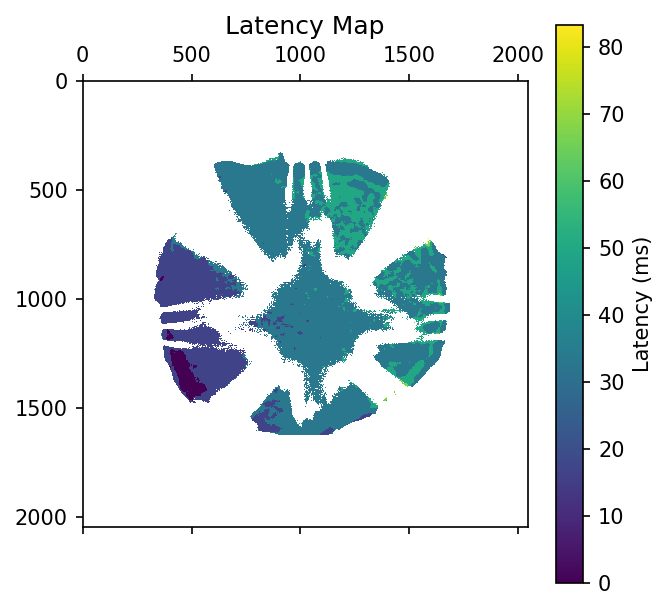

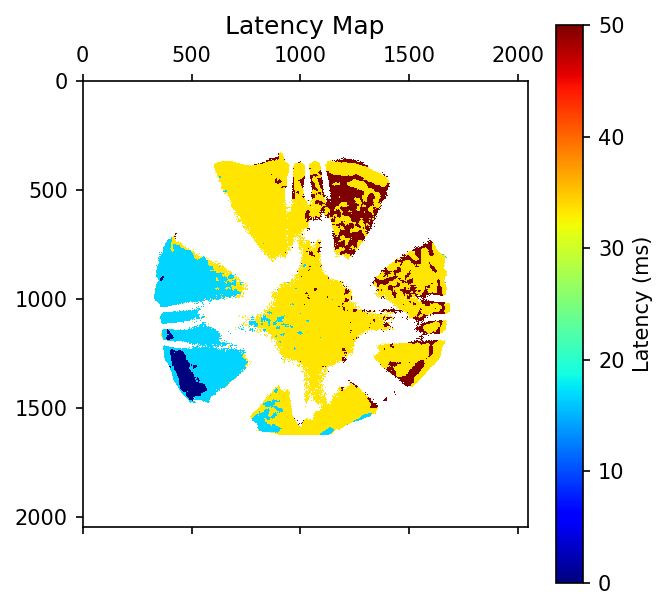

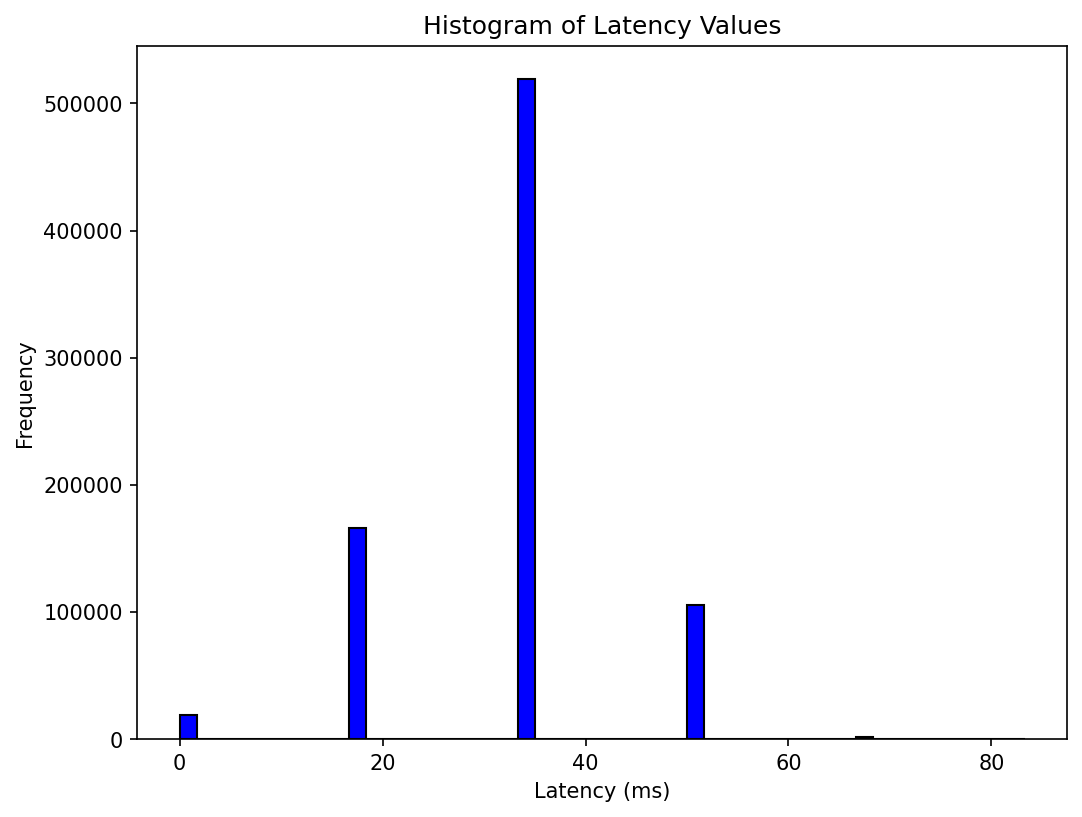

<Figure size 1200x900 with 0 Axes>

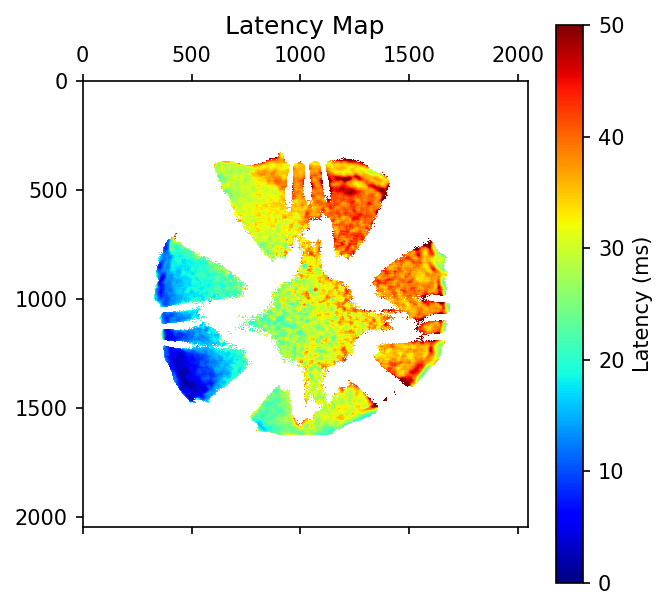

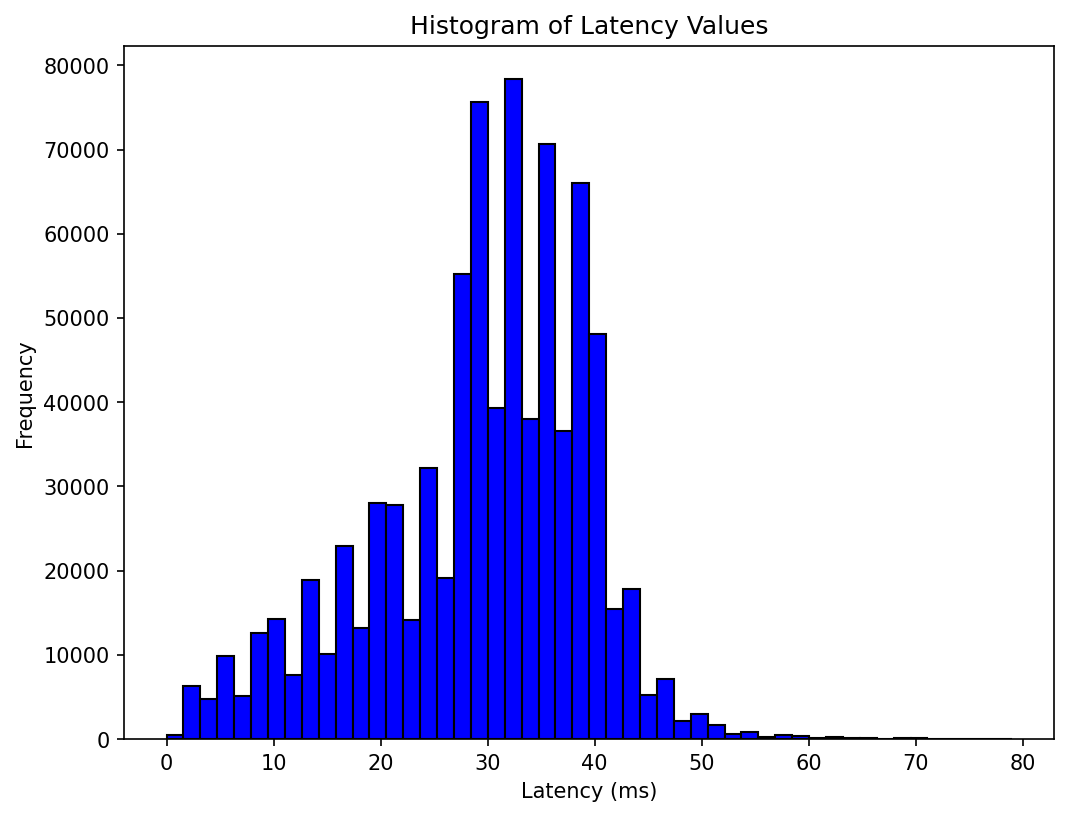

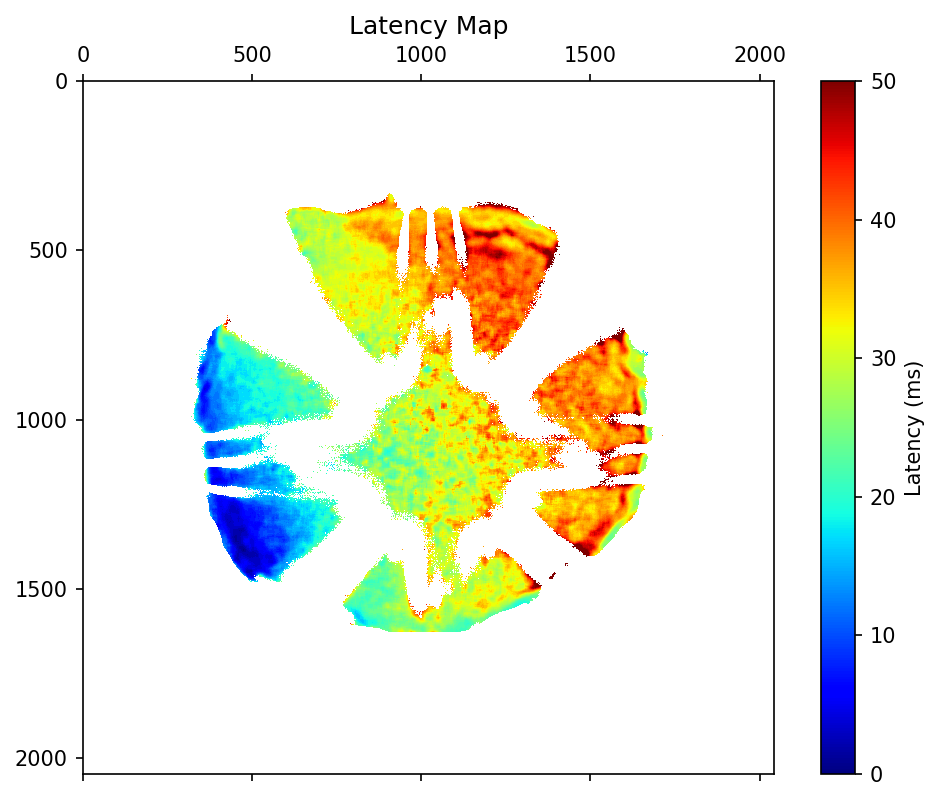

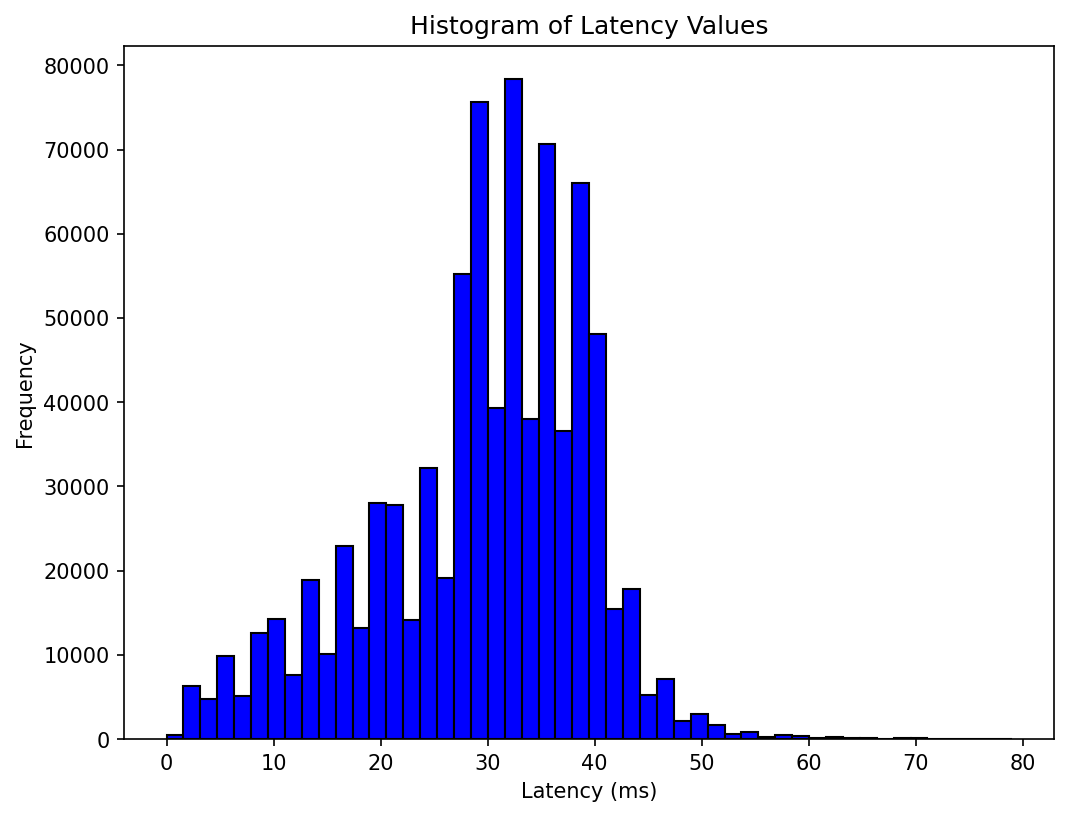

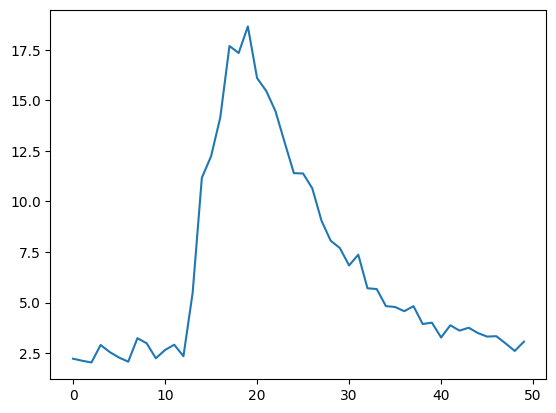

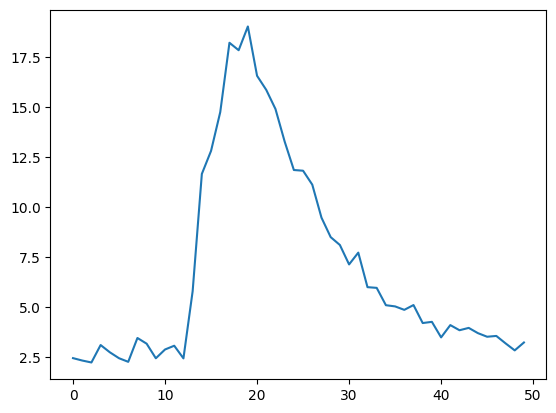

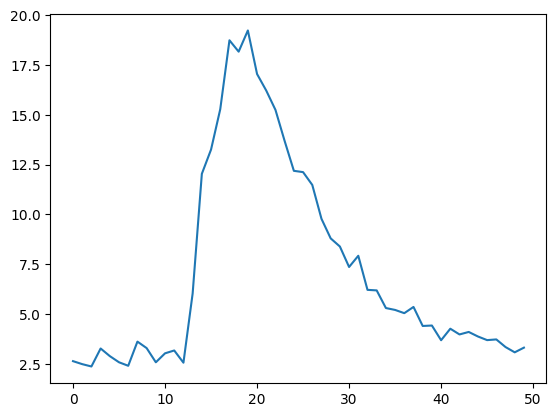

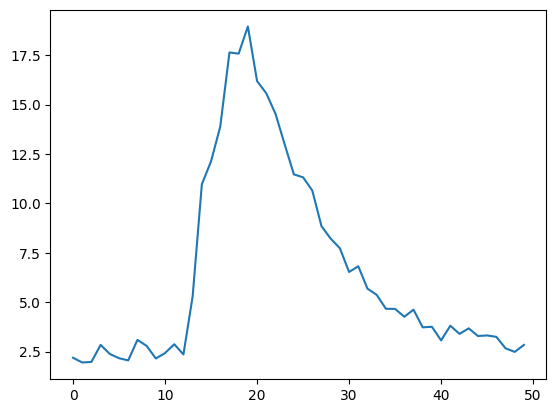

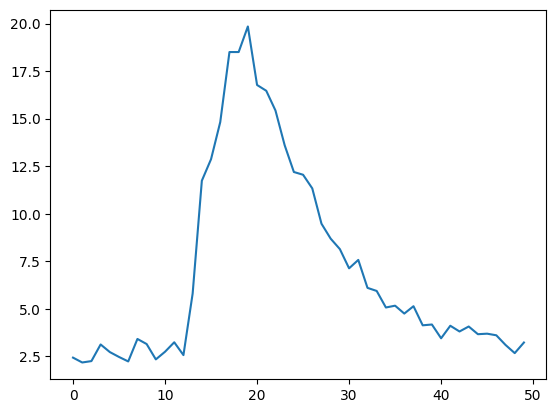

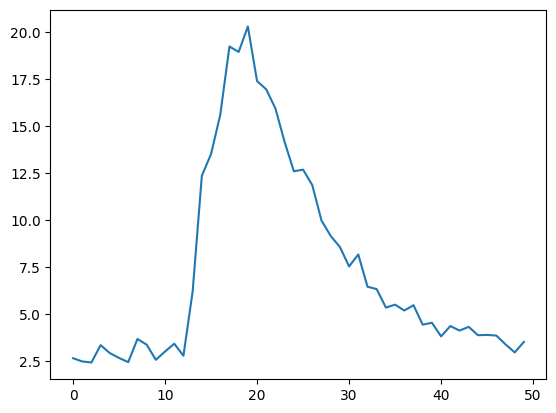

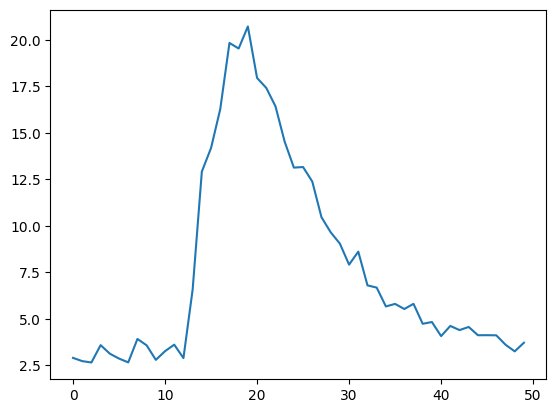

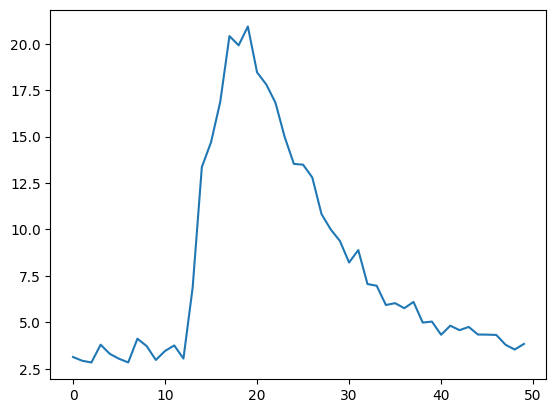

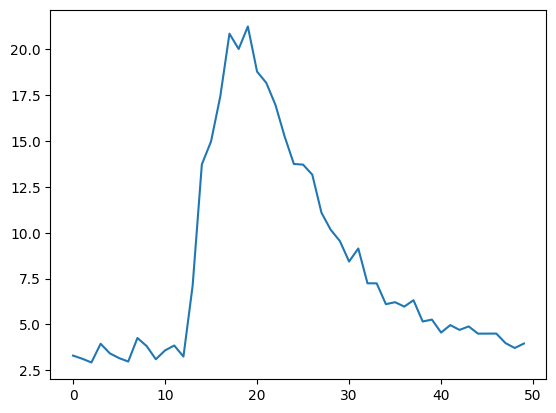

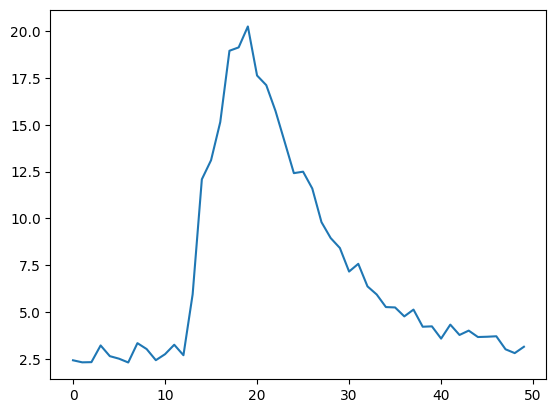

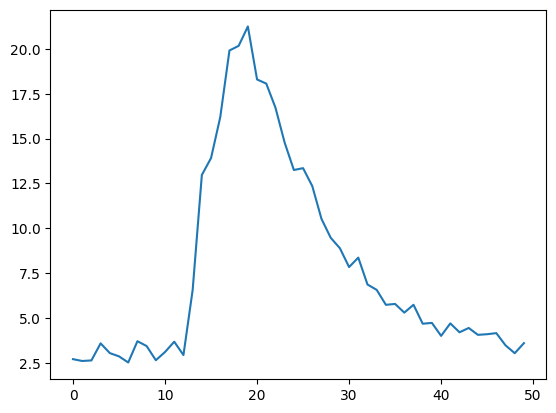

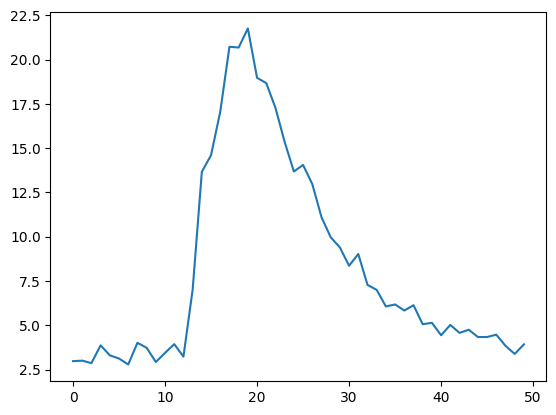

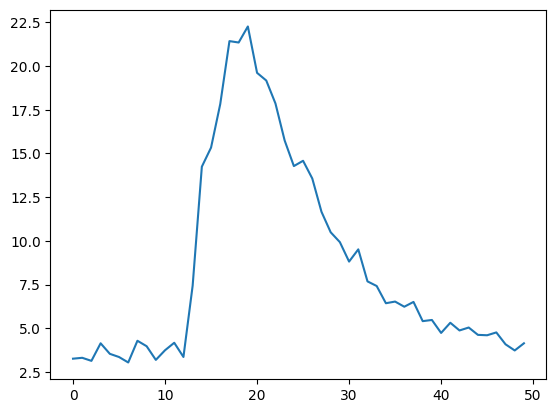

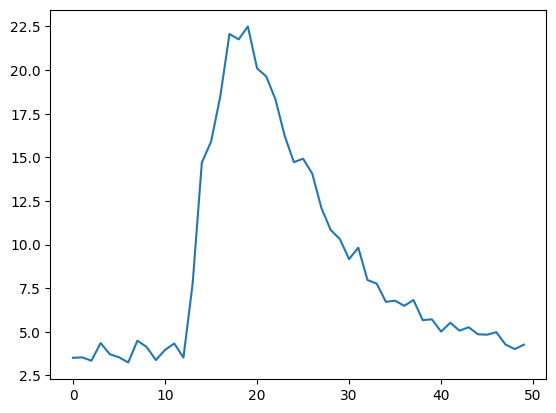

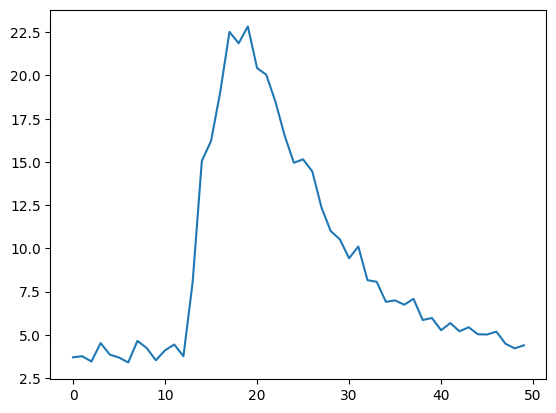

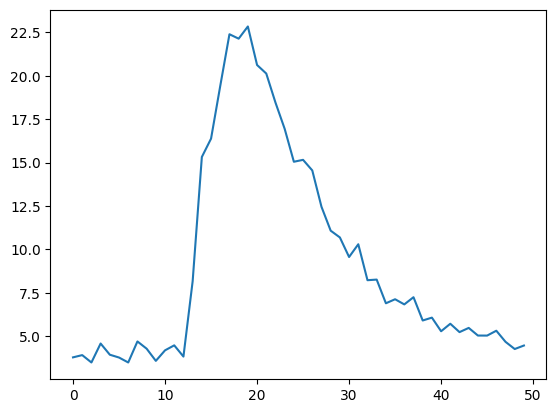

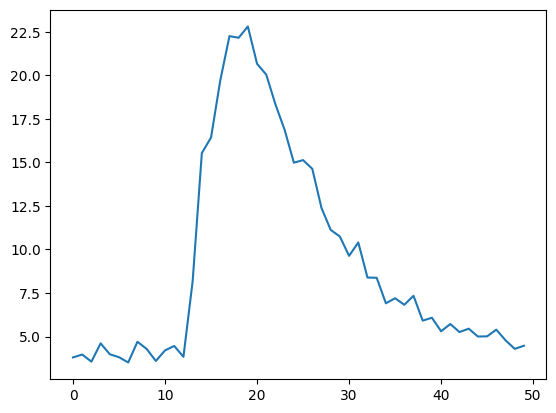

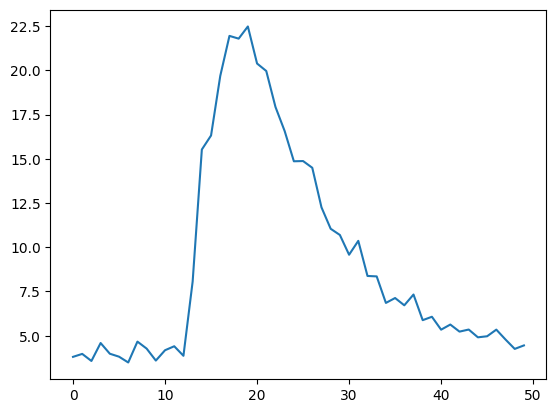

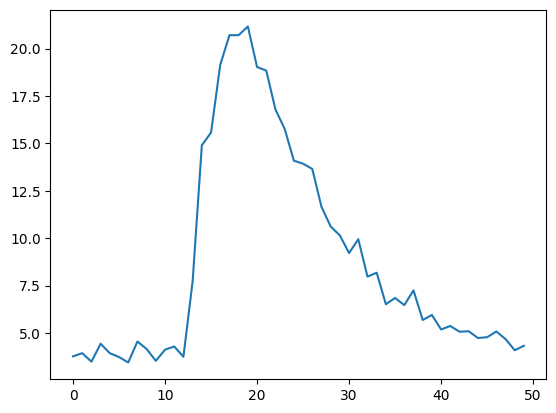

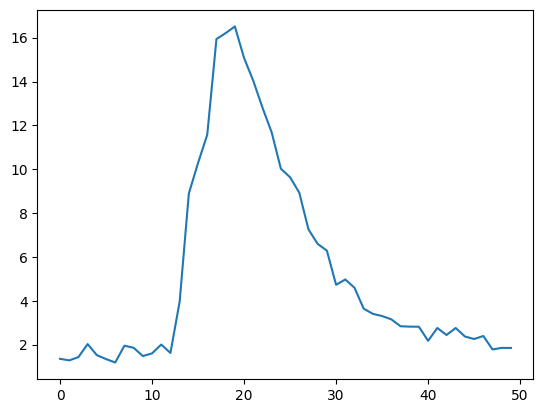

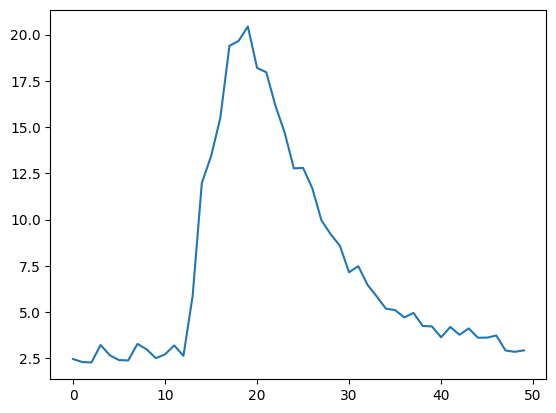

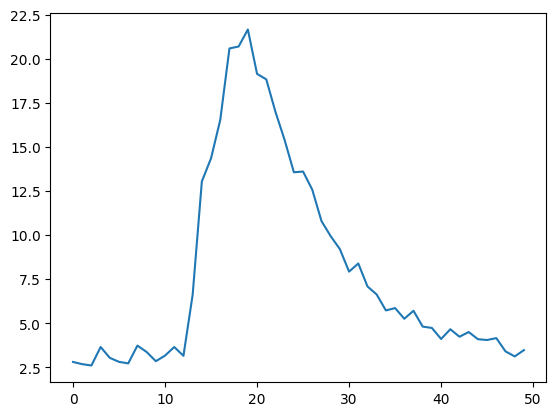

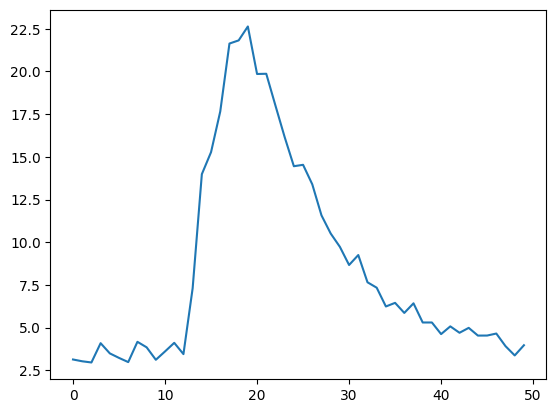

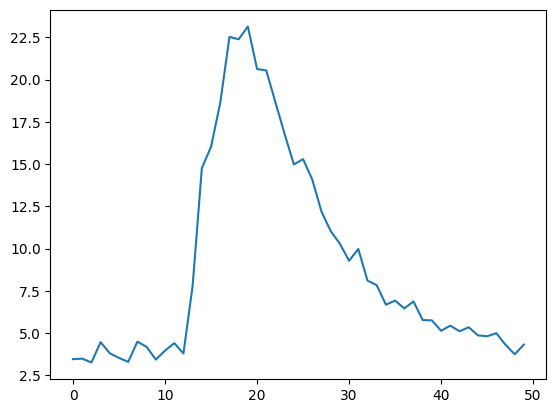

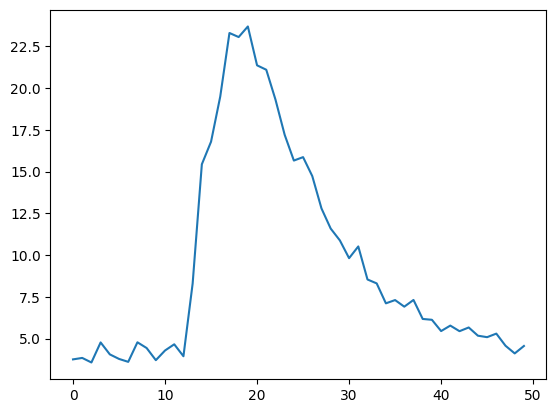

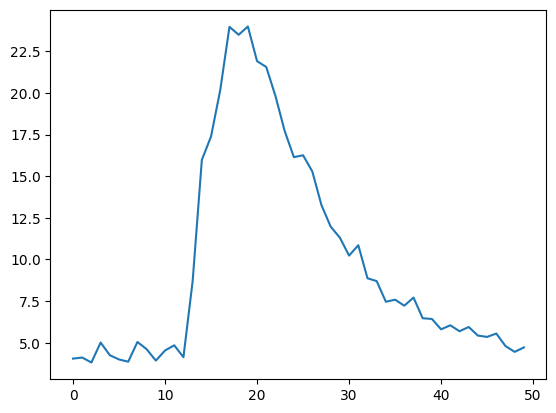

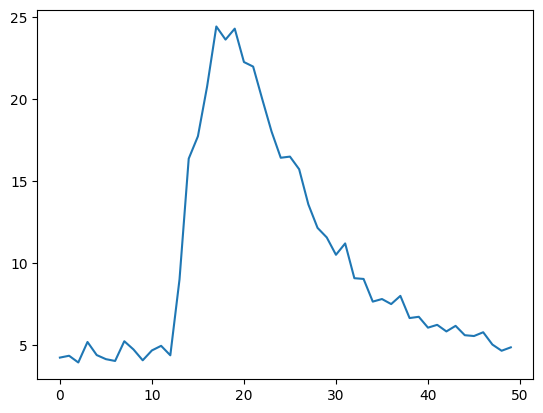

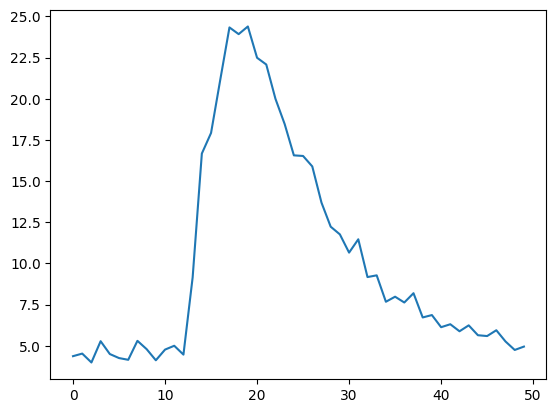

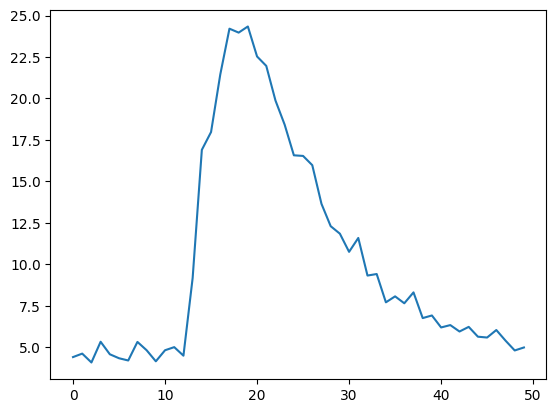

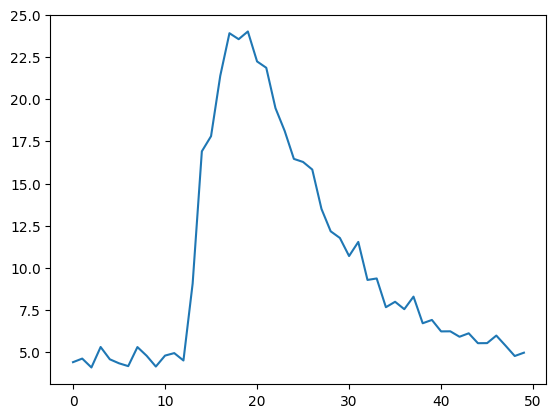

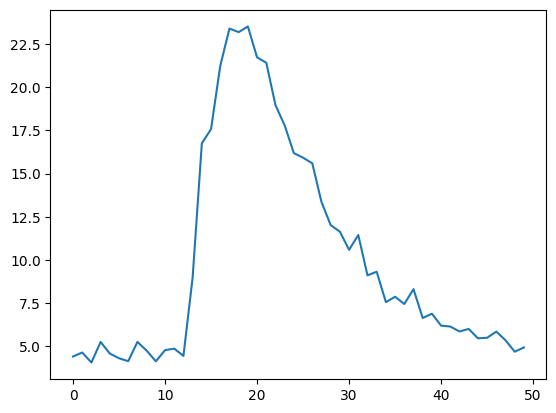

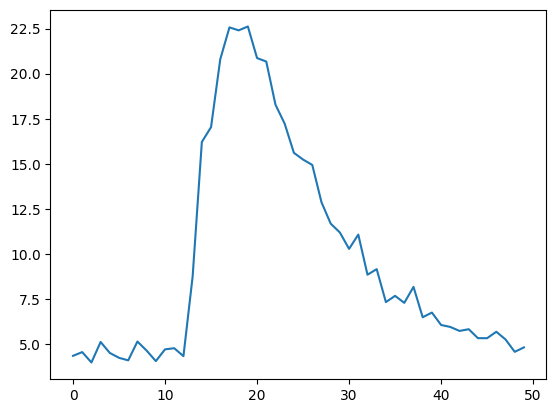

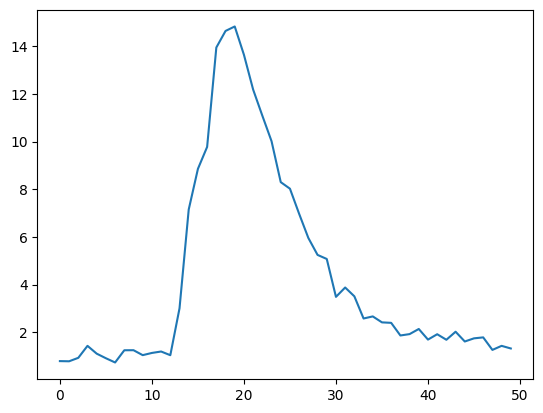

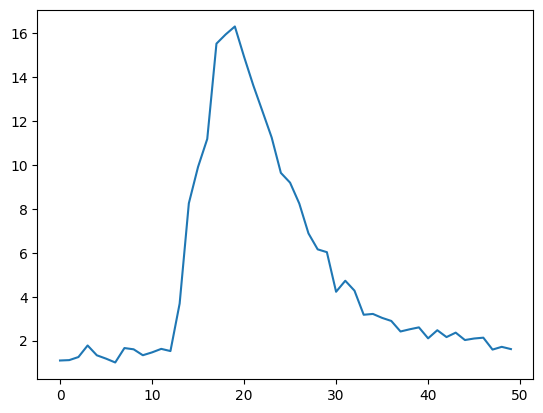

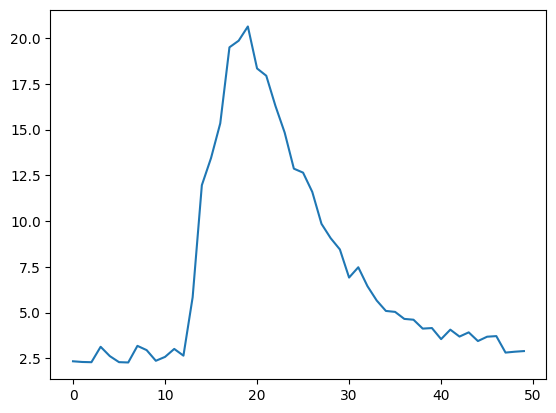

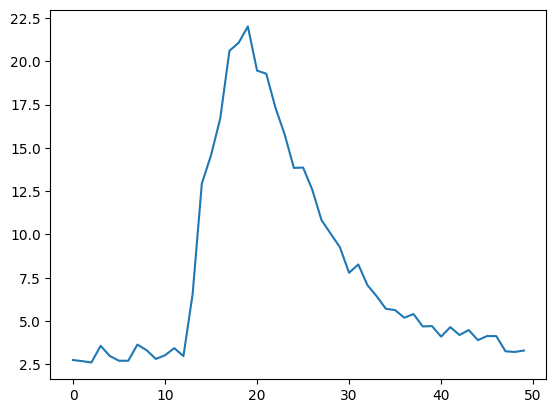

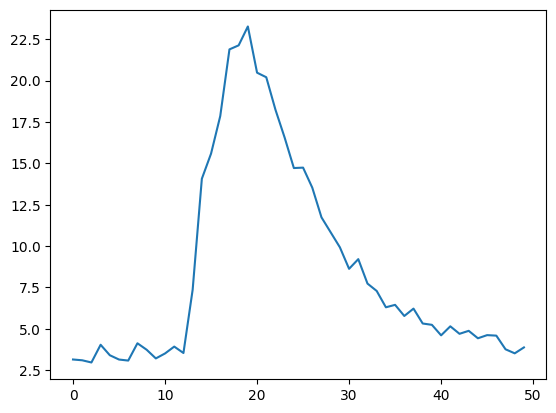

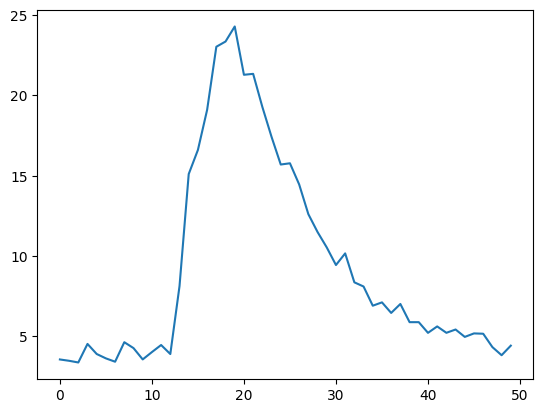

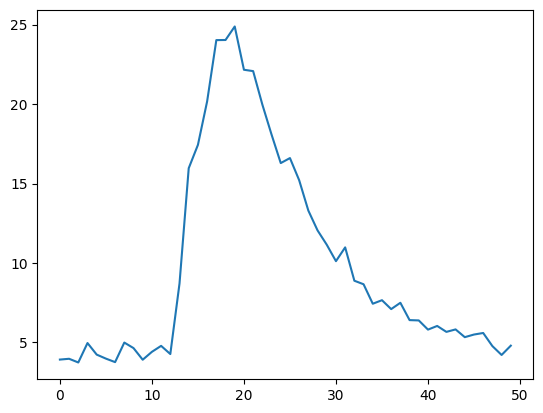

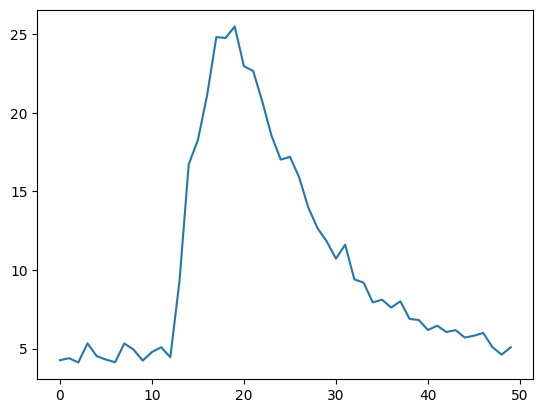

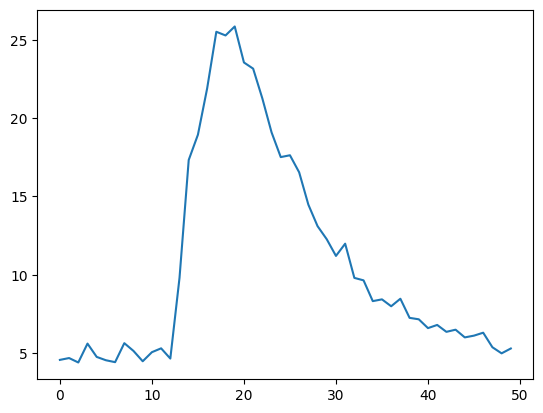

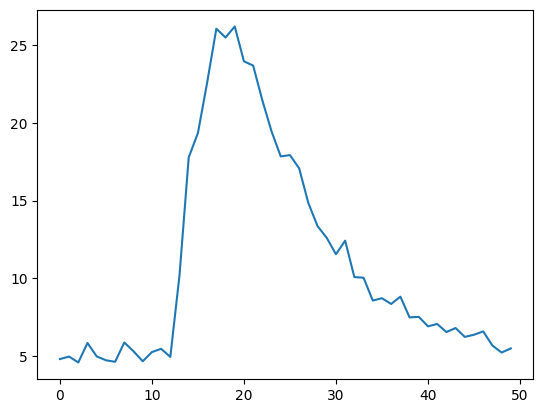

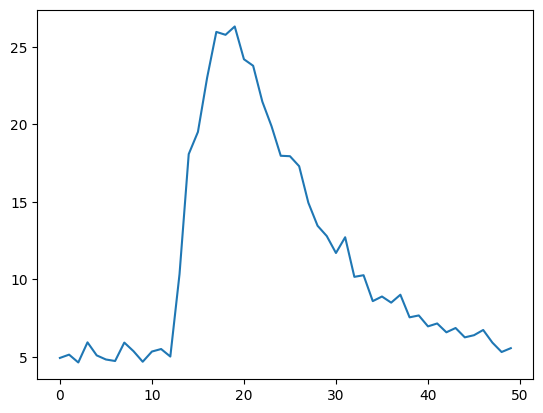

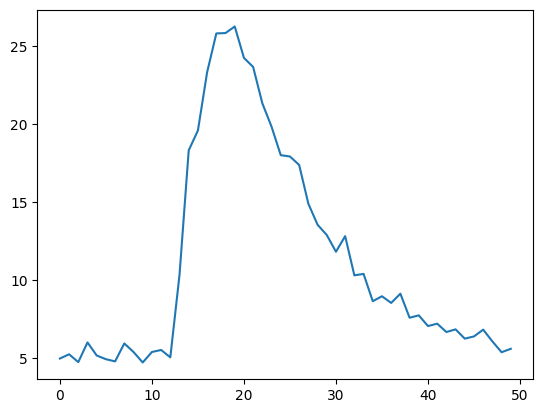

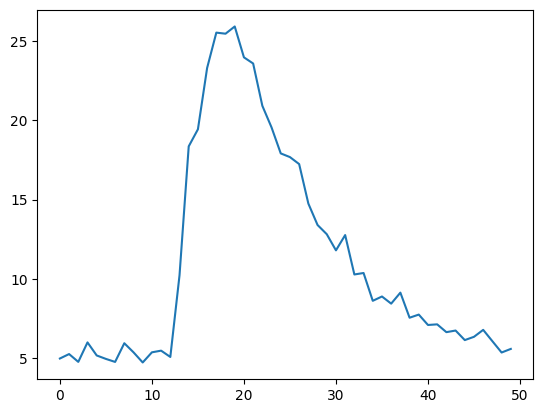

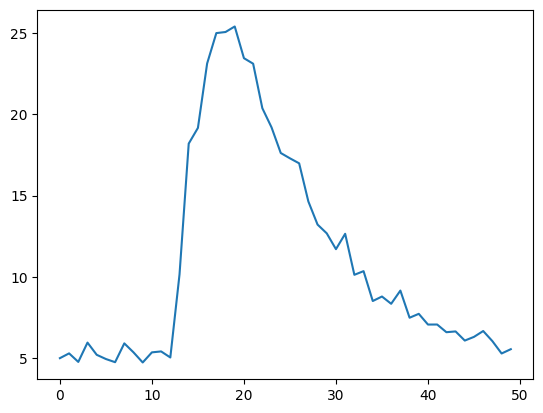

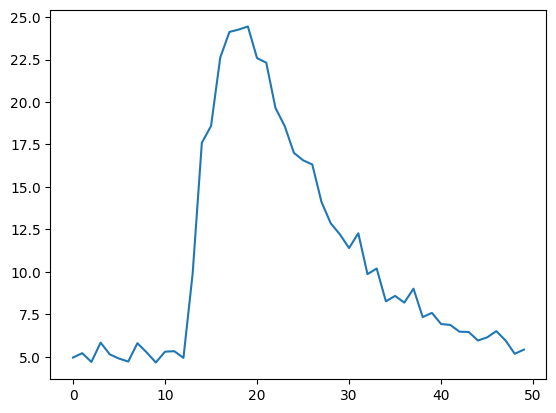

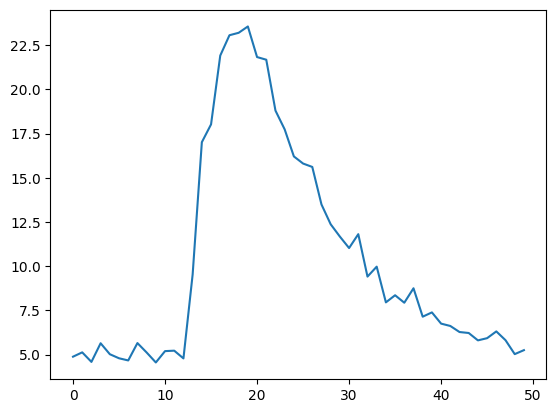

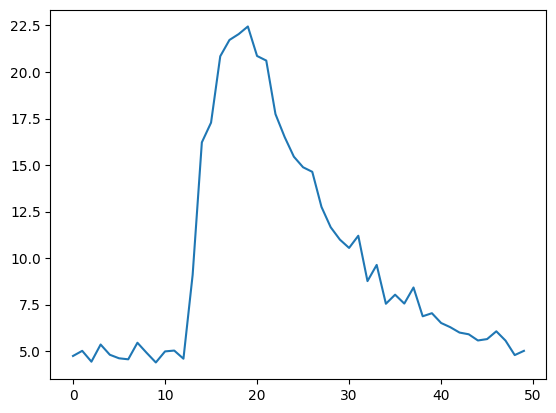

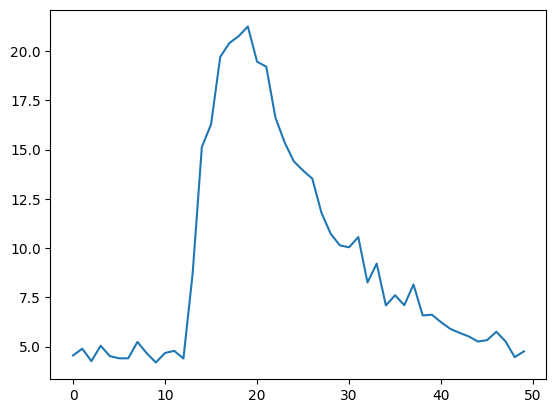

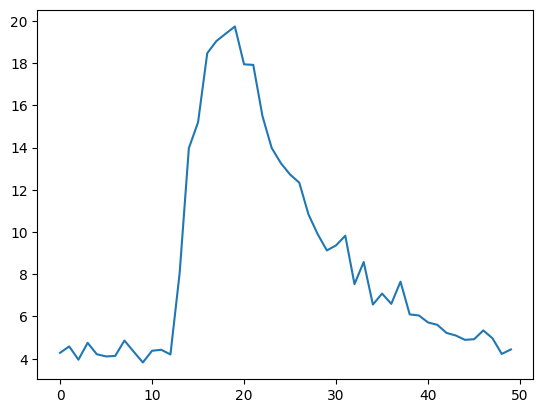

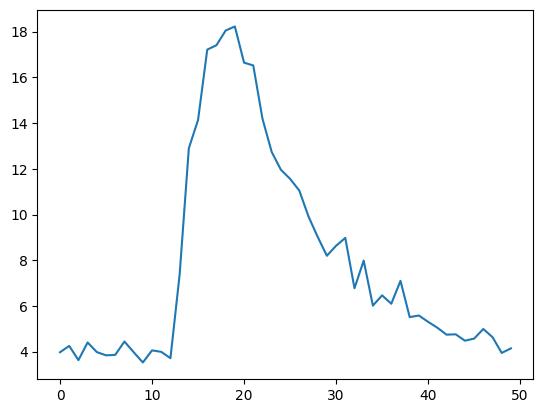

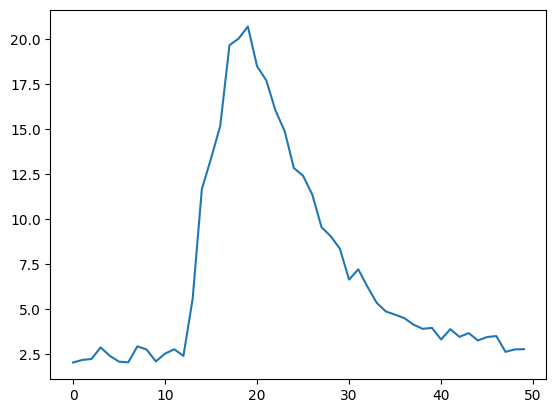

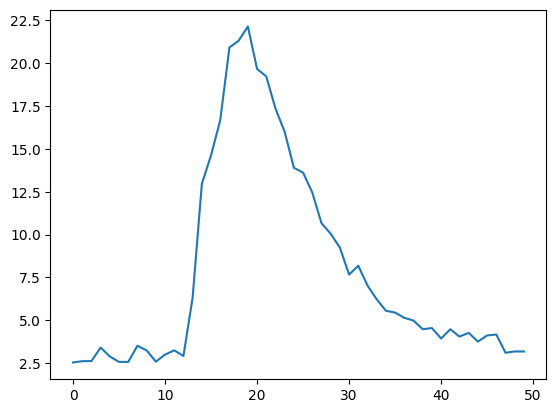

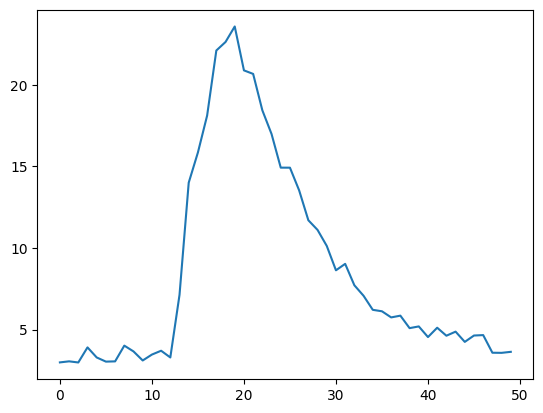

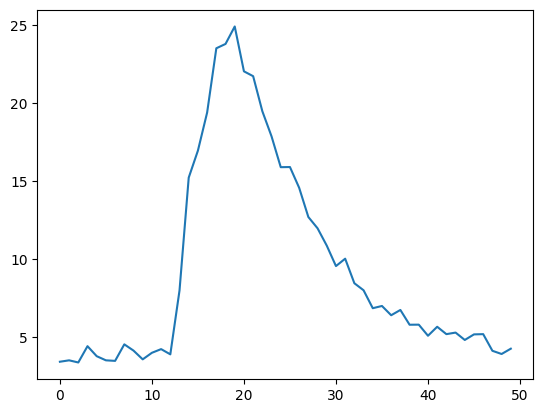

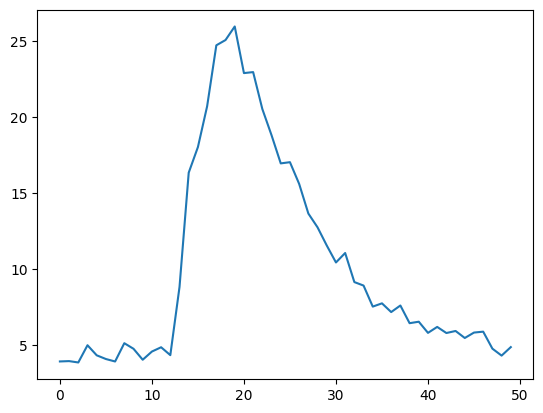

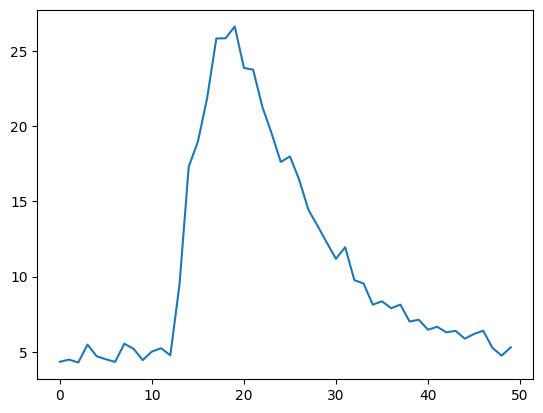

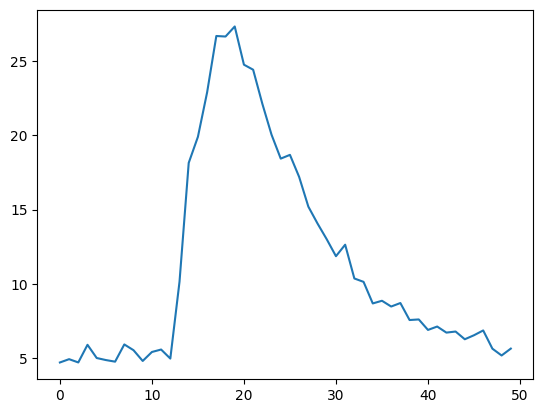

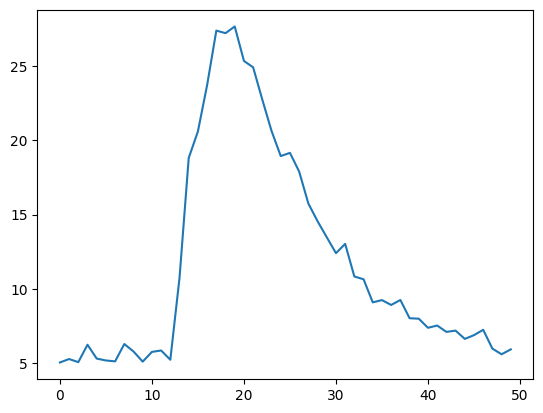

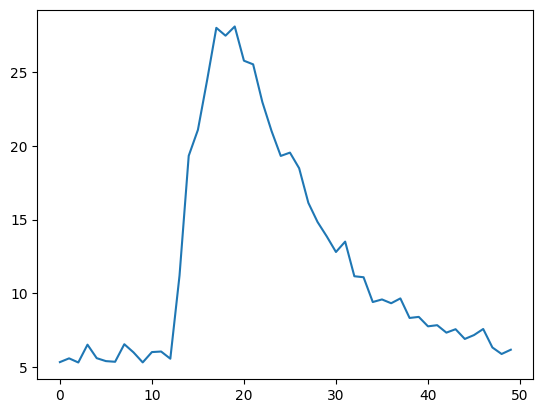

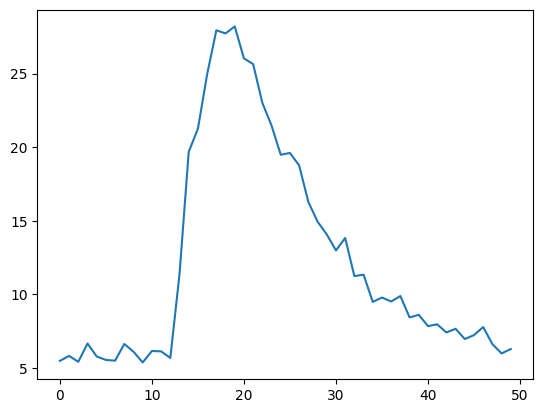

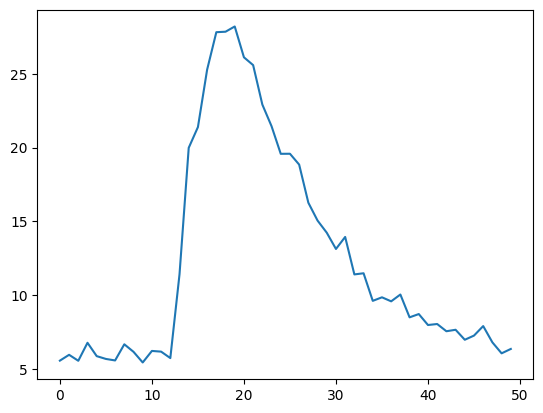

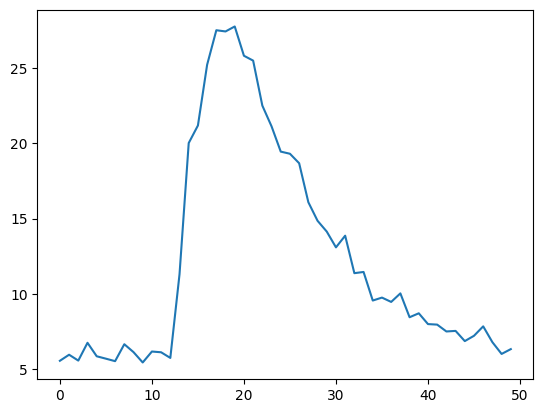

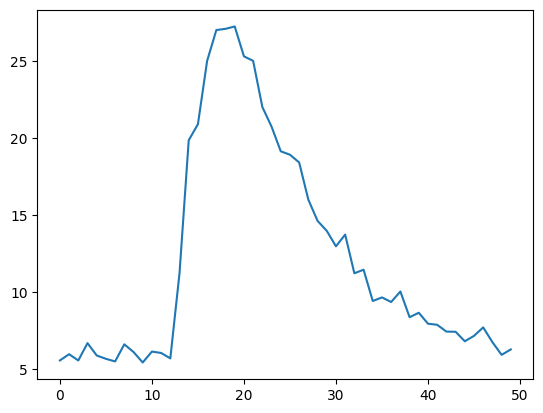

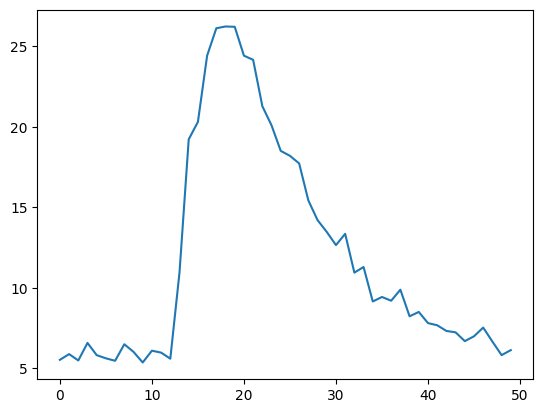

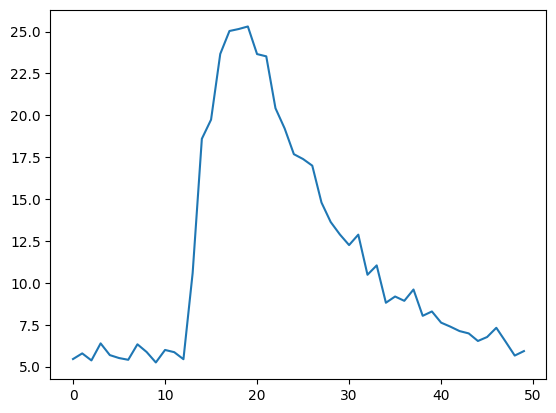

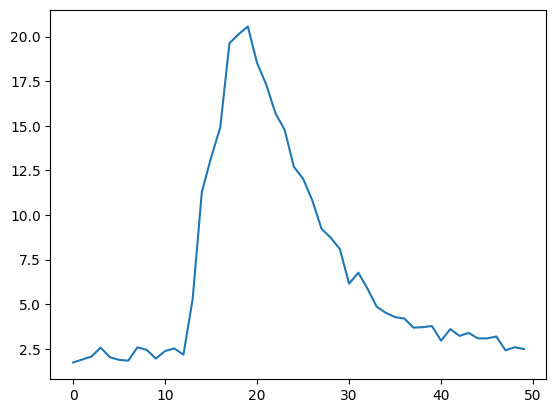

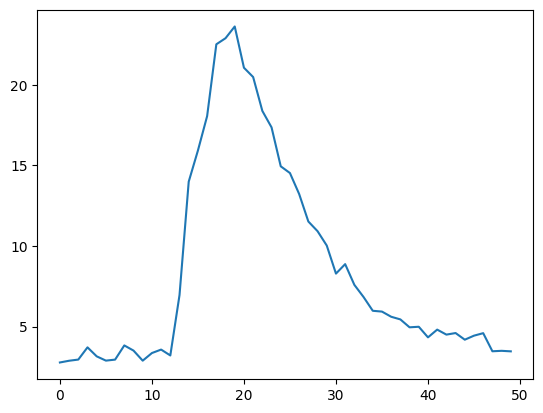

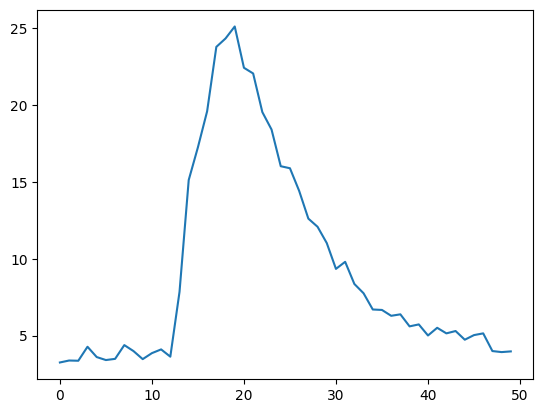

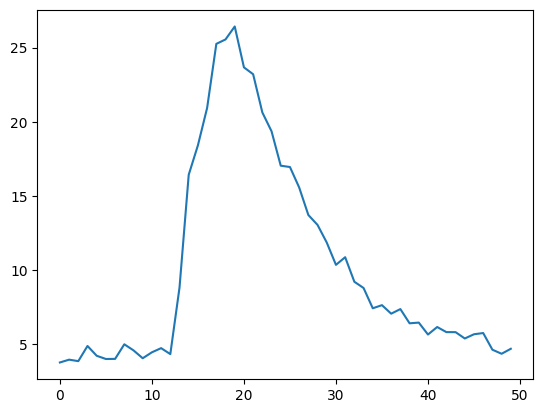

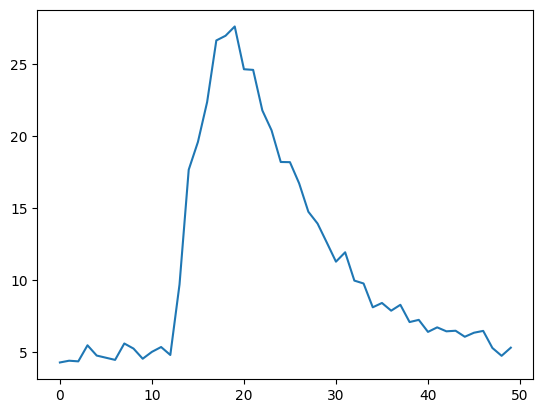

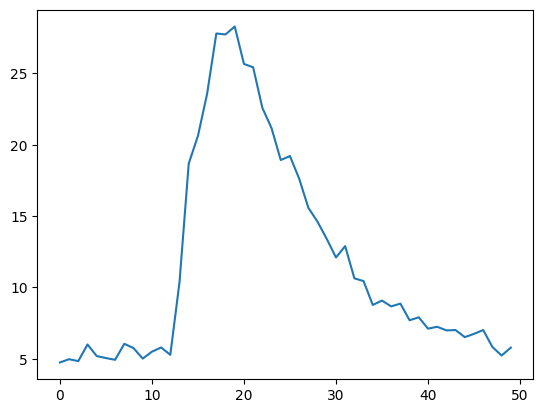

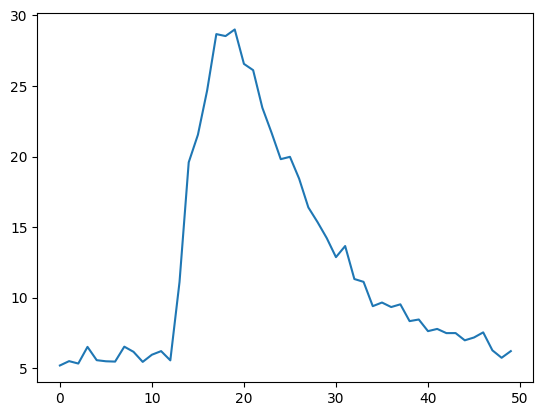

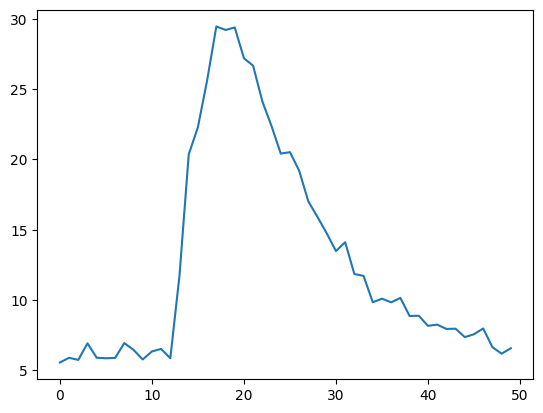

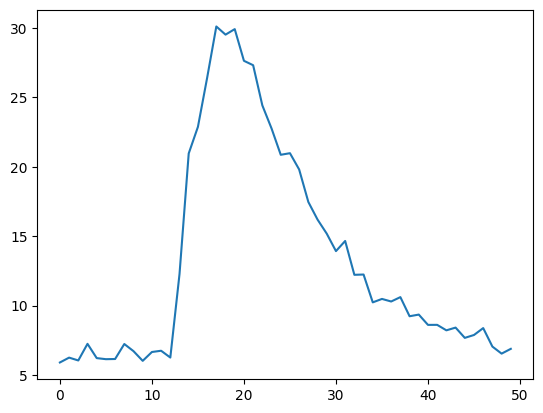

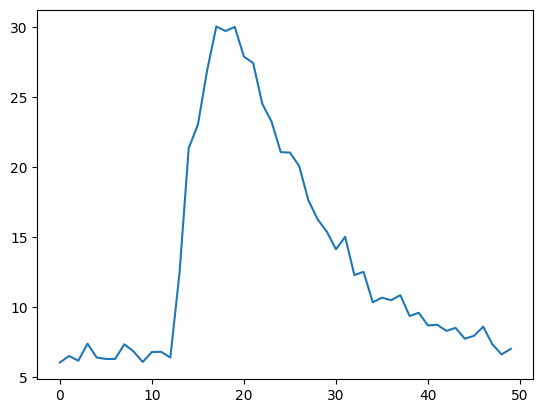

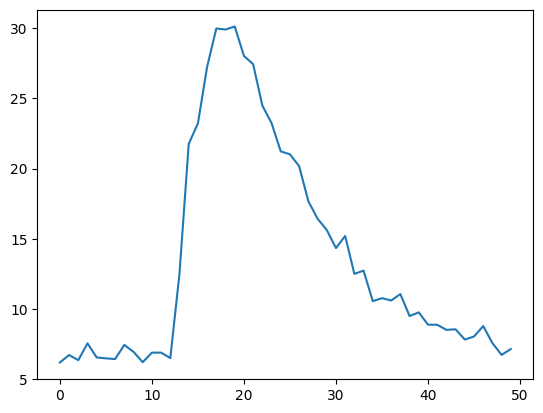

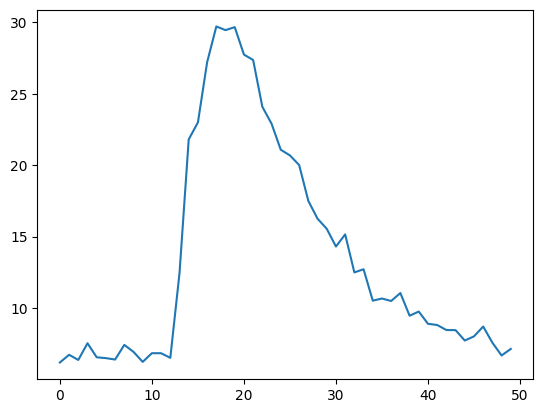

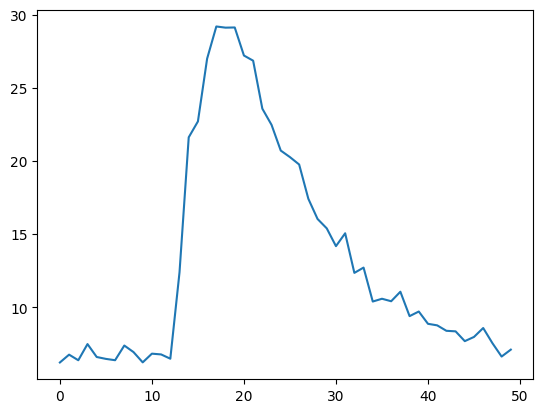

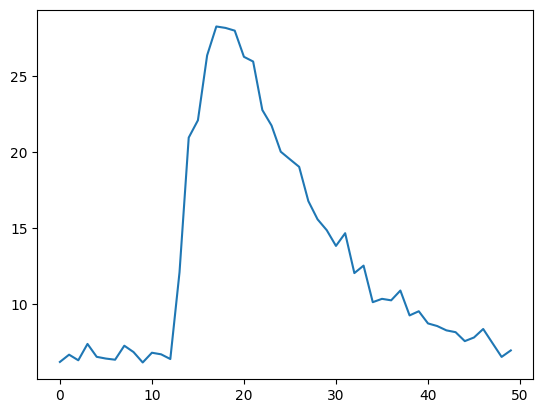

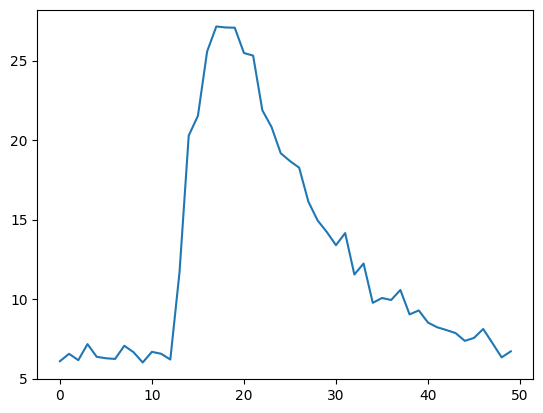

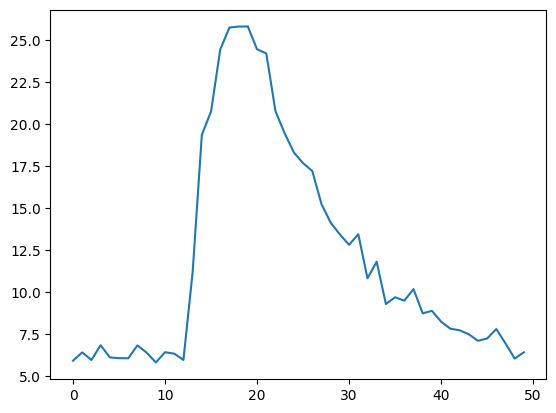

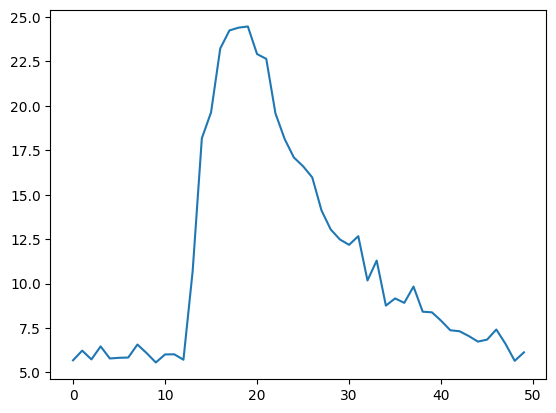

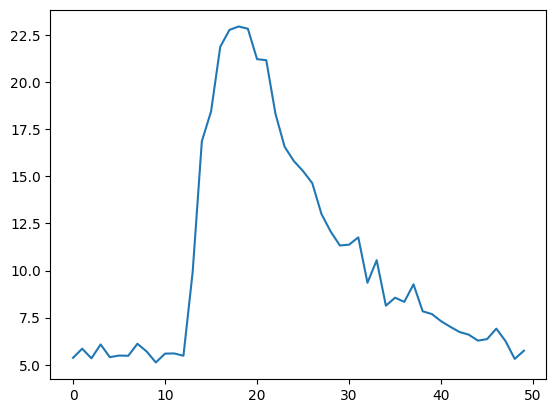

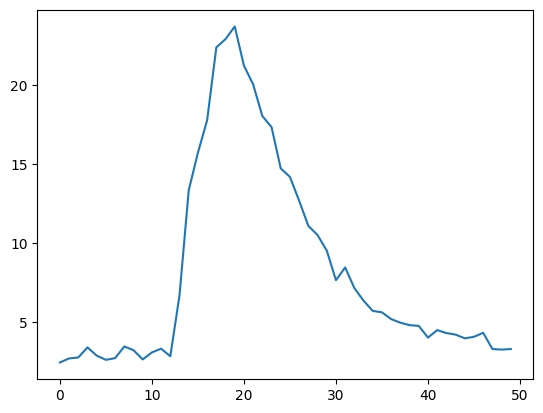

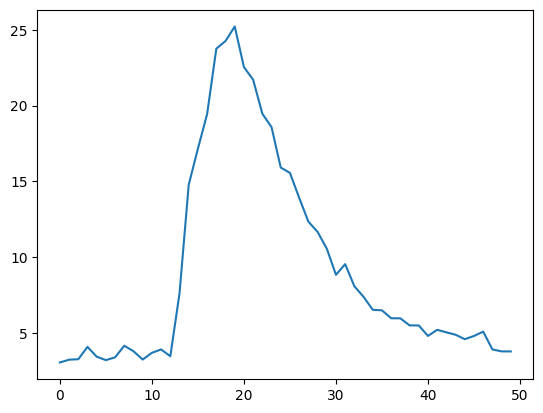

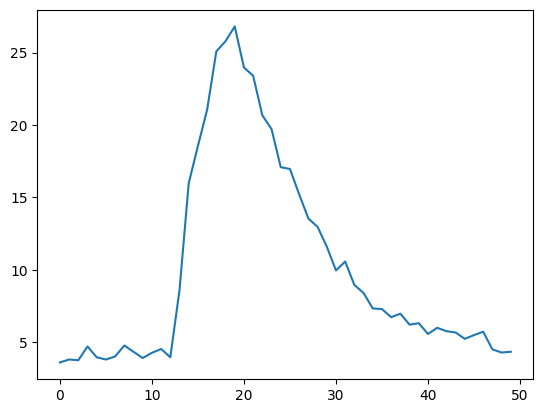

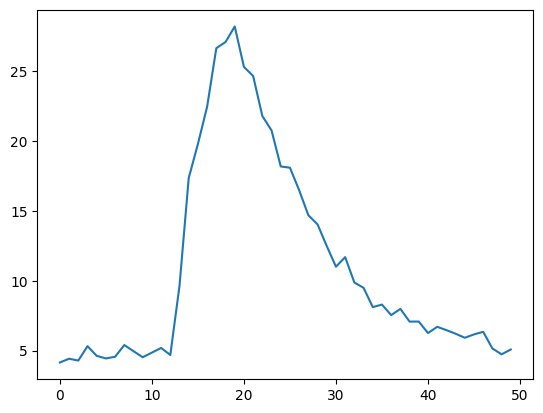

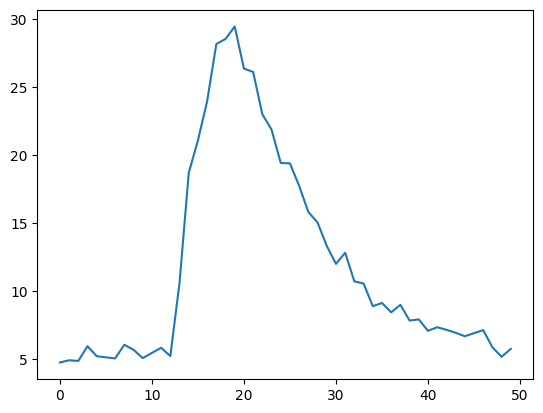

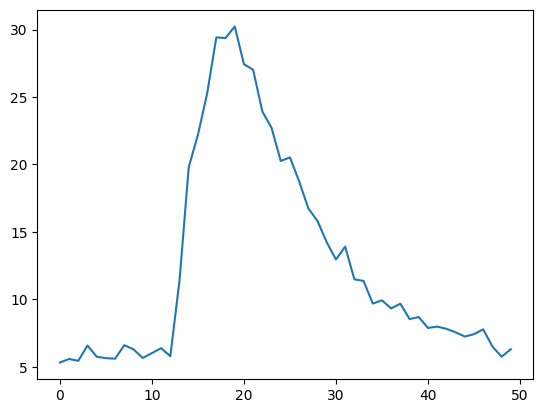

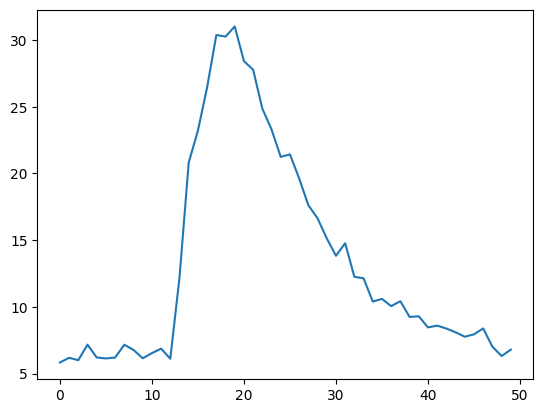

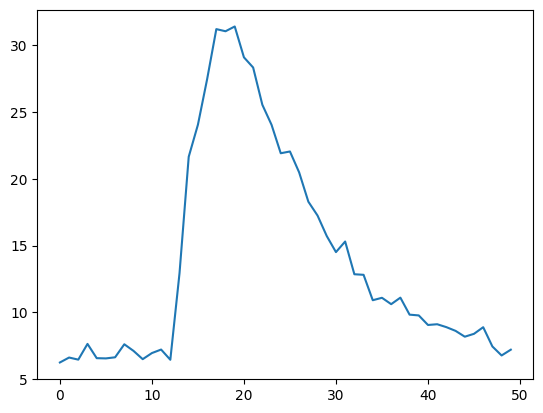

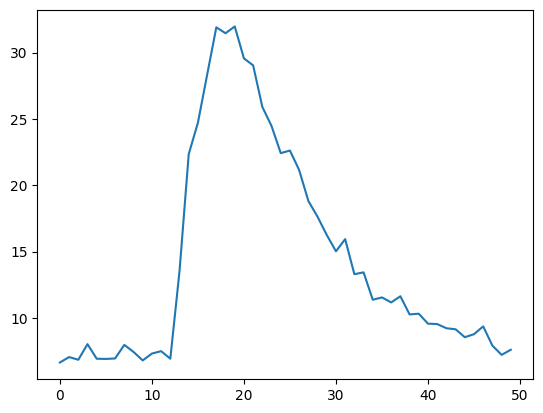

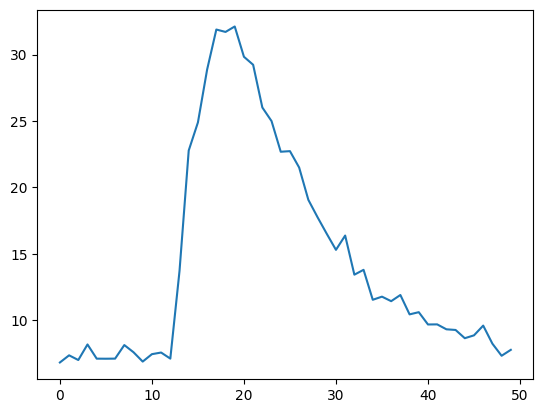

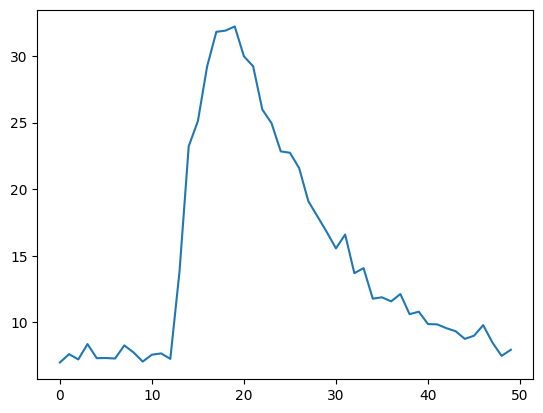

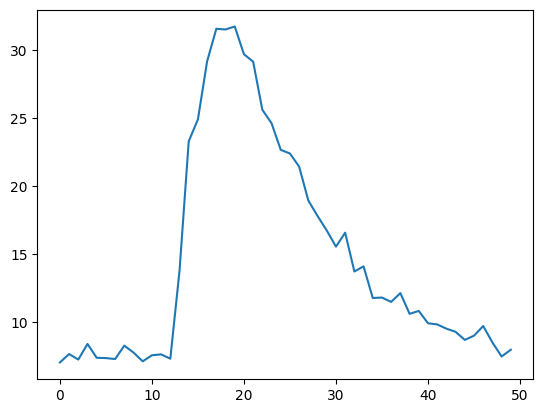

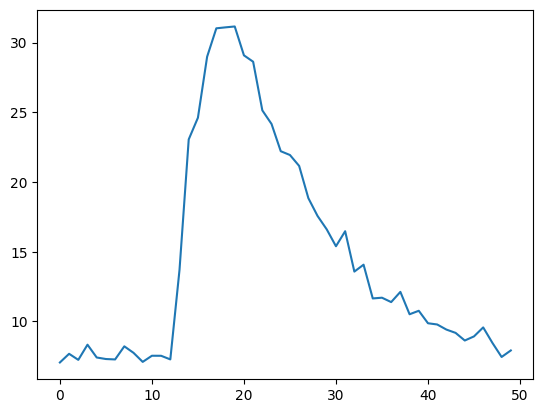

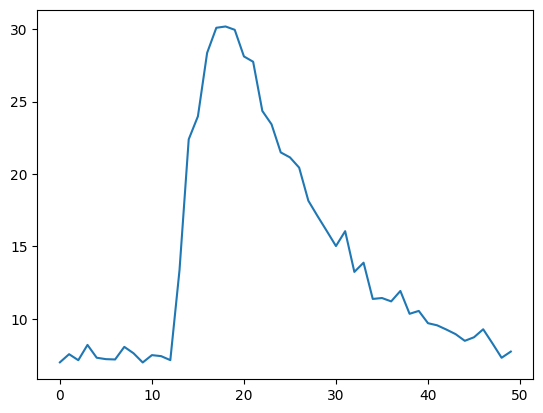

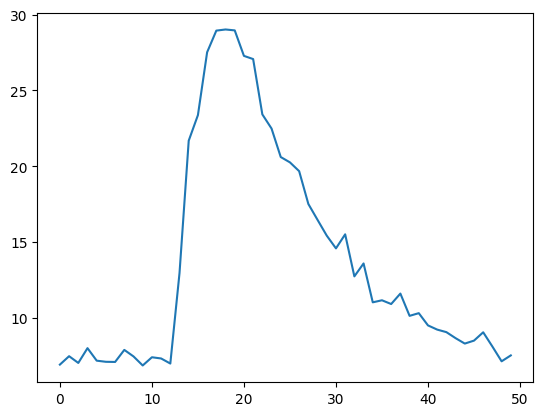

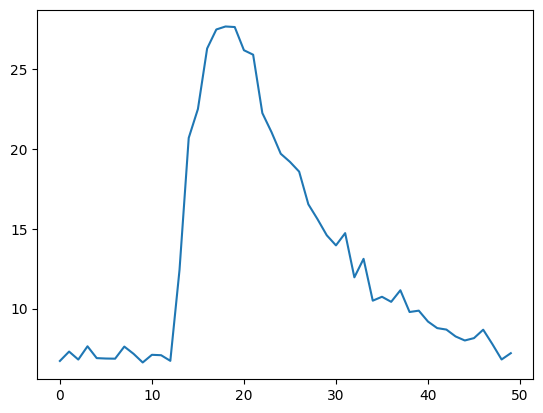

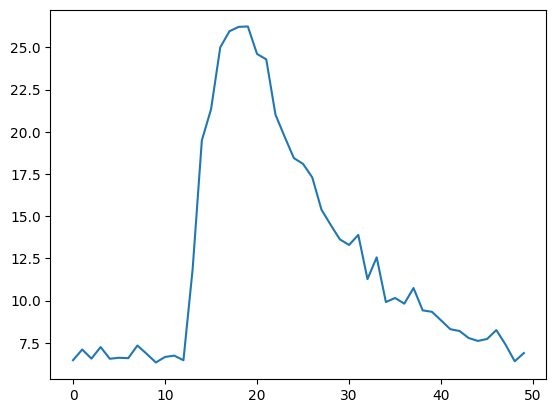

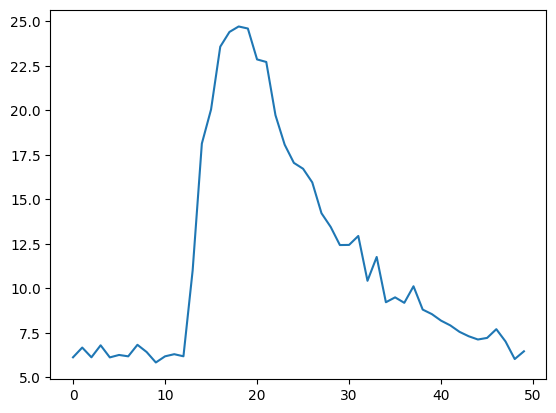

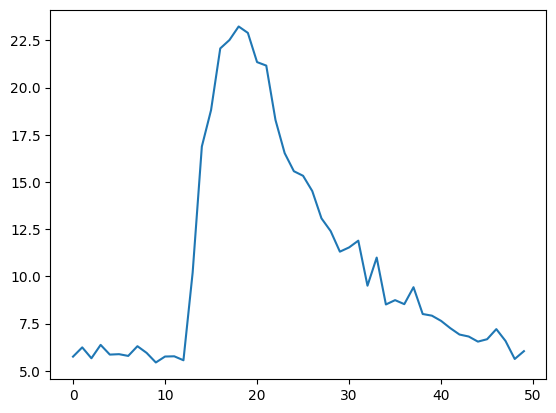

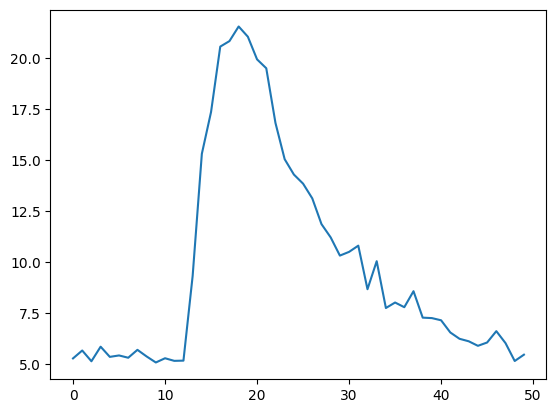

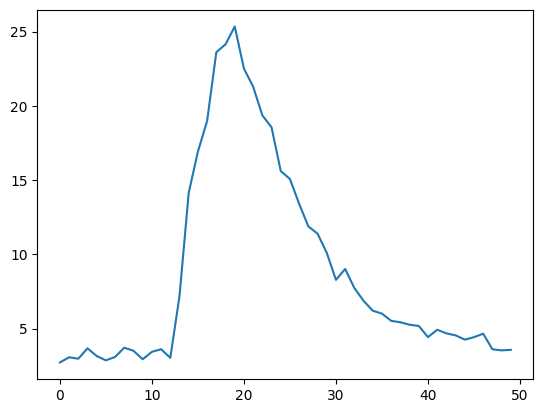

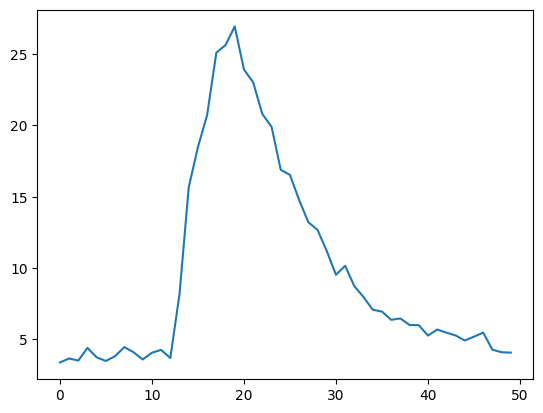

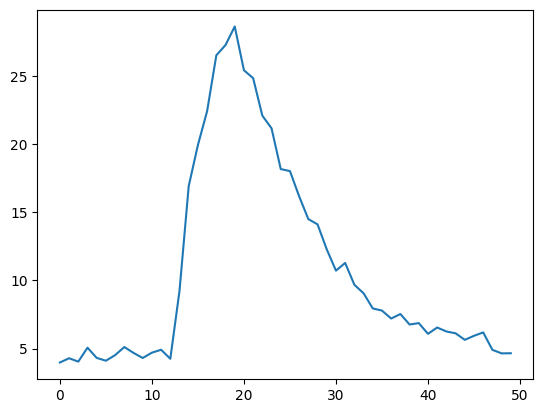

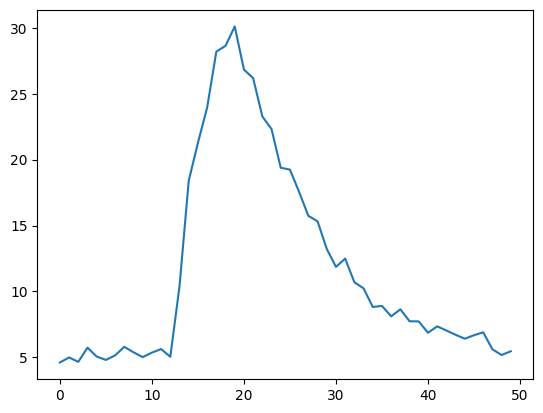

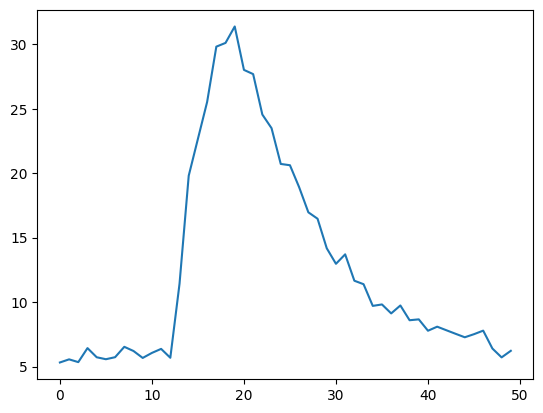

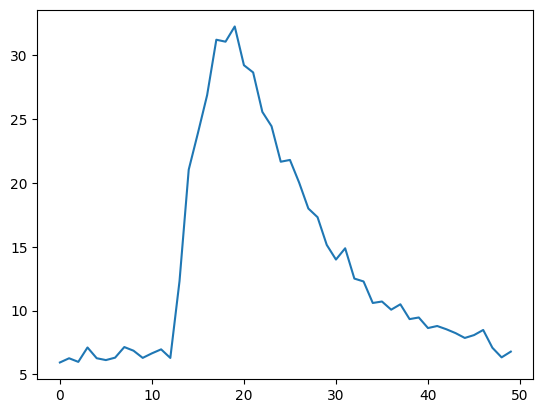

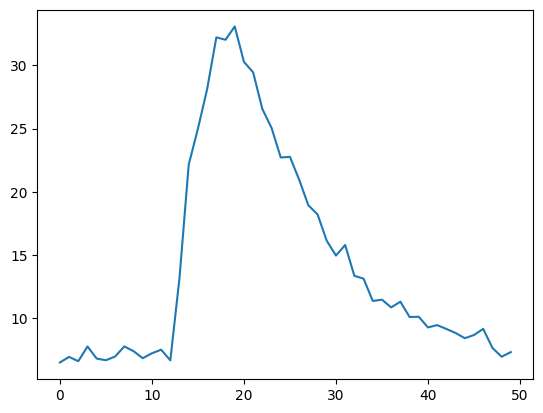

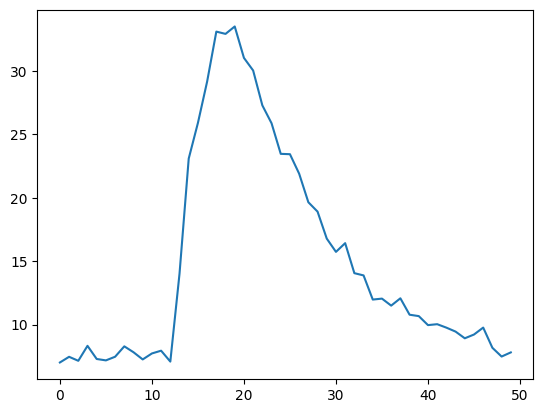

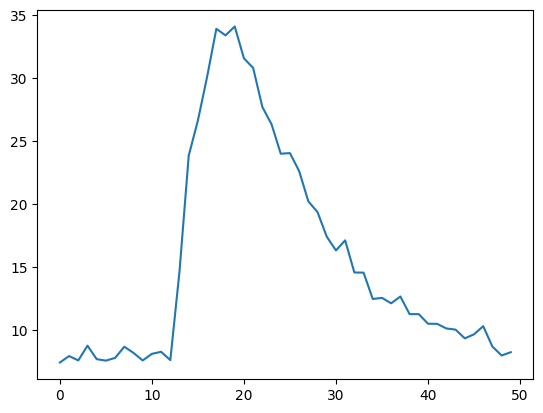

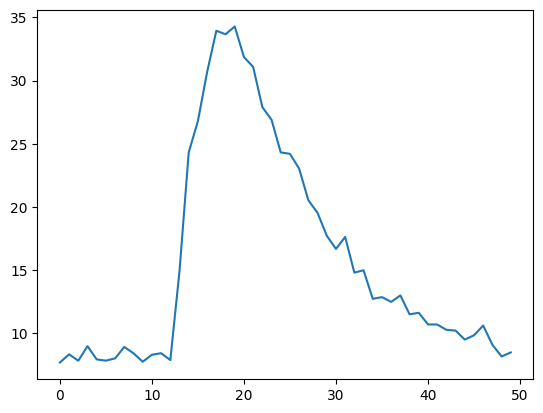

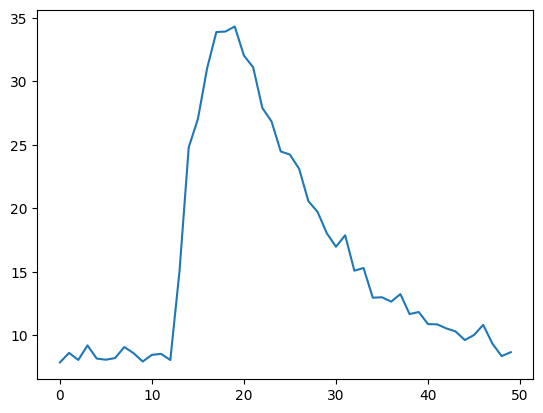

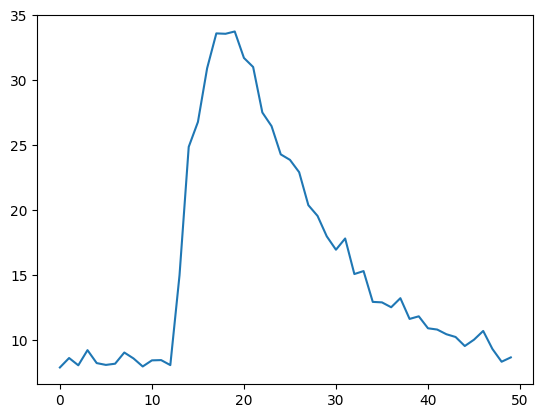

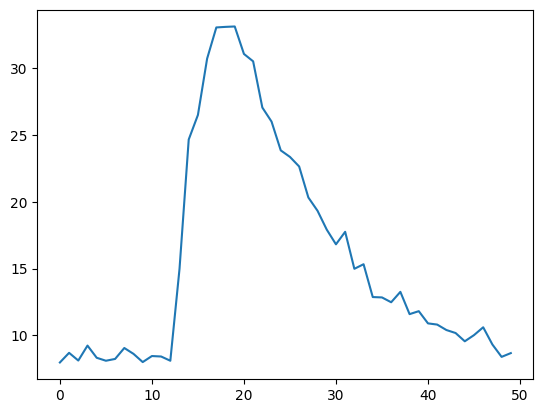

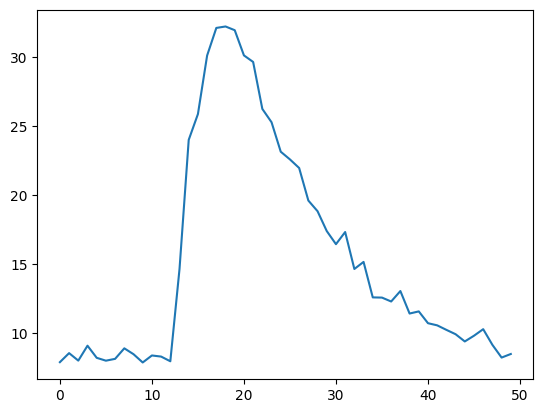

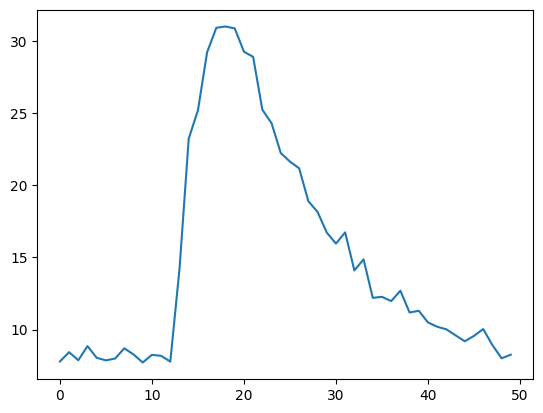

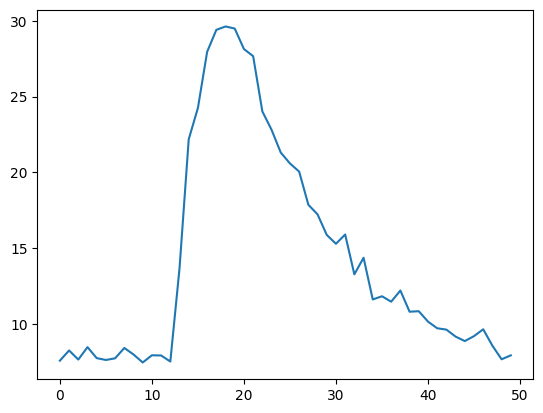

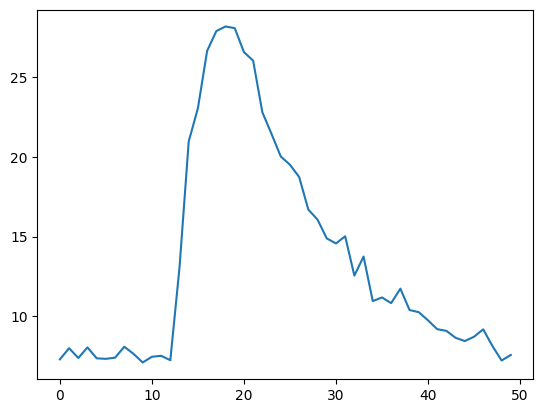

KeyboardInterrupt: 

In [10]:
# Function to calculate latency based on threshold
%matplotlib inline
def plot_intensity(data, frame_rate):
    height, width, num_frames = data.shape
    latencies = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            if binary_mask[i, j] == 255:  # Only process pixels within the mask
                strides = 10
                channel_data = data[i-strides:i+strides, j-strides:j+strides, 30:]
                channel_data_mean = np.mean(channel_data, axis=(0, 1))
                plt.figure()
                plt.plot(channel_data_mean)
                plt.show()
            else:
                latencies[i, j] = np.nan  # Use NaN for pixels outside the mask
    return latencies
plot_intensity(frames_data,60)

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.show()